# Описание проекта

**Телеком — задача проекта**

Оператор связи `«Ниединогоразрыва.ком»` хочет научиться прогнозировать отток клиентов. Если выяснится, что **пользователь** планирует **уйти**, ему будут **предложены промокоды** и **специальные условия**. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

То есть **задача проекта** - построение модели машинного обучения с предсказанием оттока клиентов

# Описание услуг

Оператор предоставляет **два** основных **типа услуг**: 

*1.* **Стационарную телефонную связь**. Возможно подключение телефонного аппарата к нескольким линиям одновременно;

*2.* **Интернет**. **Подключение** может быть **двух типов**: 
   * *через телефонную линию* (*`DSL`*, от англ. *digital subscriber line*, «цифровая абонентская линия») 
   * *или оптоволоконный кабель* (*`Fiber optic`*).
   
   
**Также доступны такие услуги:**

* `Интернет-безопасность`: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
* `Выделенная линия технической поддержки` (*TechSupport*);
* `Облачное хранилище файлов для резервного копирования данных` (*OnlineBackup*);
* `Стриминговое телевидение` (*StreamingTV*) и `каталог фильмов` (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# Метрика использования для достижения цели проекта


Бизнес-метрика здесь — это убытки по двум направлениям: 

* пользователю предложили промокоды, но он не собирался уходить (**false positive**); 
* пользователю ничего не предложили и он ушёл (**false negative**).

*`AUC-ROC`* — метрика, которая учитывает возможность балансировать между **false posititve** и **false negative**.

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

**contract.csv:**

* `customerID` - уникальный код клиента;
* `BeginDate` - дата начала пользования услугами;
* `EndDate` - дата окончания пользования услугами;
* `Type` - тип оплаты: ежемесячный, годовой и тд;
* `PaperlessBilling` - безналичный расчет;
* `PaymentMethod` - способы оплаты за услуги;
* `MonthlyCharges` - ежемесячные траты на услуги;	
* `TotalCharges` - общая сумма платежа

**personal.csv:**

* `customerID` - уникальный код клиента;
* `gender` - пол клиента; 
* `SeniorCitizen` - наличие пенсионного статуса по возрасту;	
* `Partner` - наличие супруга(и);	
* `Dependents` - наличие иждивенцев

**internet.csv:**

* `customerID` - уникальный код клиента; 
* `InternetService` - виды подключения интернет сервиса; 
* `OnlineSecurity` - блокировка небезопасных сайтов;
* `OnlineBackup` - облачное хранилище файлов для резервного копирования данных;
* `DeviceProtection` - наличие услуги антивируса; 
* `TechSupport` - услуга выделенной линии технической поддержки; 
* `StreamingTV` - услуга стримингового телевидения; 
* `StreamingMovies` - услуга каталога фильмов

**phone.csv:**

* `customerID` - уникальный код клиента;	
* `MultipleLines` - наличие возможности ведения параллельных линий во время звонка


Во всех файлах столбец `customerID` содержит код клиента.

**Информация о договорах актуальна на `1 февраля 2020`.**


# План работы

1. **Провести подготовку данных**:

   * загрузить данные
   * сделать первичный анализ
   
   
2. **Предобработка данных**:

   * исправить явно некорректные данные (например, пропуски (если есть такая возможность), дубликаты, тип данных и тд.
   
   
3. **Исследовательский анализ данных**:

   * просмотреть данные, визуализируя их на экран, 
   * просмотреть на колличественные признаки
   * выделить признаки и определить целевой признак
   * просмотреть на баланс классов в целевом (если наблюдается дизбаланс, то применить разные техники для балансирования: `upsampling`, `dowsamling`
   * отбор признаков в общем и целом
   
   
4. **Обучение модели**:

   * разделить выборку на обучающую и тестовую
   * определить модели для обучения
   * подобрать гиперпараметры для моделей при помощи `GridSearch`
   * посмотреть качество предсказаний и скорость моделей, основываясь на метрику качества **roc_auc**
   * выбрать лучшую модель по метрике качества
   
   
5. **Финальная проверка модели**:

   * лучшая выверенная модель проходит финальуню проверку на тестовой выборке
   * также модель проверятся на адекватность при помощи метрики **accuracy**


6. **Отчет по решению**:
   
   * Описываем алгоритм действий на протяжении всего анализа, конспектируя это все в общий вывод

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install phik

import phik
from phik.report import plot_correlation_matrix

     |████████████████████████████████| 679 kB 2.7 MB/s eta 0:00:01


Так как данные состоят из разных файлов, создадим функцию **func_create**, которая преобразует данные в датасеты:

In [2]:
def func_create(csv): # аргумент csv принимает значение файла из папки '/datasets/final_provider/'
    return pd.read_csv('/datasets/final_provider/' + csv)

data_contract = func_create('contract.csv')
data_personal = func_create('personal.csv')
data_internet = func_create('internet.csv')
data_phone = func_create('phone.csv')

Также создадим функцию **my_info**, которая будет выводить информацию о датасете

In [3]:
def my_info(x, y):  # аргумент x примет значение сохраненного датасета в переменной;
                    # аргумент y примет описательный характер датасета, по которому будет описываться информация
    print(y)
    display(x.head())
    print(f'Размер {y}: {x.shape}')
    print()
    print(f'Информация о {y}:')
    print()
    display(x.info())
    display(x.describe(include='all')) # чтобы включить в таблицу категориальные признаки, укажем include='all'
    print(f'Кол-во пропущенных значений в {y}:') 
    display(x.isna().sum())
    print()
    print(f'Кол-во дубликатов в {y}: {x.duplicated().sum()}')
    display(x.head())

### Таблица Contract

Начнем с **таблицы**, содержащая **данные о контрактах**

In [4]:
my_info(data_contract, 'data_contract')

data_contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Размер data_contract: (7043, 8)

Информация о data_contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,0993-OSGPT,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Кол-во пропущенных значений в data_contract:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Кол-во дубликатов в data_contract: 0


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


**Описание данных**

* `customerID` - уникальный код клиента;
* `BeginDate` - дата заключения договора;
* `EndDate` - дата окончания договора;
* `Type` - тип оплаты за услуги;
* `PaperlessBilling` - безбумажный расчётный лист;
* `PaymentMethod` - способы оплаты за услуги;
* `MonthlyCharges` - ежемесячные платежи;	
* `TotalCharges` - общая сумма платежа

**Замечаем, что:**

* Названия колонок записаны в не очень удобном регистре. Приведем названия колонок в **нижний регистр**;
* Тип данных в колонках: `BeginDate` и `EndDate` является строковым **str**, хотя там хранятся даты. Корректнее поменять тип данных на **datetime**;
* Также тип данных в колонке `TotalCharges` является точно не корректным - строковым **str**. Меняем на вещественный тип данных **float**

In [5]:
def str_lower(data):
    data.columns = data.columns.str.lower()


str_lower(data_contract)
#data_contract.columns = data_contract.columns.str.replace(r'([A-Z])', r' \1').str.lower().str.replace(' ', '_')\
#.str[1:]
data_contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Также замечаем, что в самих объектах содержится тоже неудобный формат - заглавные буквы. Приведем все строки в нижний регистр, кроме колонки с уникальным кодом **customerid**

In [6]:
columns_to_lower = ['enddate', 'type', 'paperlessbilling', 'paymentmethod'] # переменные, где приведем все строки в нижний

def lower(data):
    
    for i in columns_to_lower:
        data[i] = data[i].str.lower()
    
    return data


data_contract = lower(data_contract)
data_contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,no,one year,no,mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,no,one year,yes,mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,no,one year,yes,credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,no,month-to-month,yes,electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,month-to-month,yes,mailed check,74.40,306.6


### Таблица Personal

In [7]:
my_info(data_personal, 'data_personal')

data_personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Размер data_personal: (7043, 5)

Информация о data_personal:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,0993-OSGPT,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


Кол-во пропущенных значений в data_personal:


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


Кол-во дубликатов в data_personal: 0


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


* `customerID` - уникальный код клиента;
* `gender` - пол клиента; 
* `SeniorCitizen` - наличие пенсионного статуса по возрасту;	
* `Partner` - наличие супруга(и);	
* `Dependents` - наличие иждивенцев

**Замечаем, что:**

* Также стоит привести в нижний регистр;
* Признак с гендером можно кодировать;
* Пропуски и дубликаты отсутствуют

### Таблица Internet

In [8]:
my_info(data_internet, 'data_internet')

data_internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Размер data_internet: (5517, 8)

Информация о data_internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9786-YWNHU,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Кол-во пропущенных значений в data_internet:


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


Кол-во дубликатов в data_internet: 0


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


* `customerID` - уникальный код клиента; 
* `InternetService` - виды подключения интернет сервиса; 
* `OnlineSecurity` - блокировка небезопасных сайтов;
* `OnlineBackup` - облачное хранилище файлов для резервного копирования данных;
* `DeviceProtection` - наличие услуги антивируса; 
* `TechSupport` - услуга выделенной линии технической поддержки; 
* `StreamingTV` - услуга стримингового телевидения; 
* `StreamingMovies` - услуга каталога фильмов

**Замеаем, что:**

* Нижний регистр;
* Кол-во данных (строк) по польщователям интернет-услуг ограничен, то есть меньше общего;
* Можно кодировать признаки;
* Пропуски и дубликаты отсутствуют

### Таблица Phone

In [9]:
my_info(data_phone, 'data_phone')

data_phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Размер data_phone: (6361, 2)

Информация о data_phone:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,0993-OSGPT,No
freq,1,3390


Кол-во пропущенных значений в data_phone:


customerID       0
MultipleLines    0
dtype: int64


Кол-во дубликатов в data_phone: 0


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


* `customerID` - уникальный код клиента;	
* `MultipleLines` - наличие возможности ведения параллельных линий во время звонка

**Замечаем, что:**

* Снова нижний регистр;
* Снова можно провести кодирвоание бинарного признака (прямого);
* Пропуски и дубликаты отсутствуют

### Вывод

* На предварительном этапе предосмотра данных вывели пункты, по которым стоит исправить
* Следующим шагом будет предобработка данных и исследовательский анализ

## Предобработка данных

Рассмотрели датасеты, теперь приступаем к их обработке

* Начнем с датафрейма с контрактами **contract**

In [10]:
data_contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,no,one year,no,mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,no,one year,yes,mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,no,one year,yes,credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,no,month-to-month,yes,electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,month-to-month,yes,mailed check,74.40,306.6


* Ранее подметили, что не верный тип данных хранится в колонках `'begindate'`, `'enddate'` - нужно поменять на **datetime**. Также в признаке **enddate** хранится иформация об уходе клиента:
   * занчени `no` - не ушел, 
   * дата - ушел в этот день
   
Это и является целью поставленной задачи - то есть **целевым признаком**. Из него сделаем целевой признак с говорящим названием **exited**, что и будет целевым признаком. Так как в условиях сказано (и проверено), что данные даны (выгрузка) на `2020-02-01`, заменим значени `'no'` на эту дату:

* **0** будет обозначать дату начала данных, то есть клиент **не ушел**, 
* **1** дату окончания контракта, то есть **ушел**

При помощи анонимной функции `lambda` внедряем в колонку с окончанием контракта `enddate` и образуем целевой признак `exited`

In [11]:
data_contract['exited'] = data_contract['enddate'].apply(lambda i: 0 if i == 'no' else 1)

In [12]:
display(data_contract.loc[data_contract['enddate'] == 'no', 'enddate'].count())
data_contract.loc[data_contract['exited'] == 0, 'exited'].count() 

5174

5174

In [13]:
data_contract.loc[data_contract['enddate'] == 'no', 'enddate'] = '2020-02-01'
data_contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,one year,yes,mailed check,84.80,1990.5,0
7039,2234-XADUH,2014-02-01,2020-02-01,one year,yes,credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,2019-03-01,2020-02-01,month-to-month,yes,electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,month-to-month,yes,mailed check,74.40,306.6,1


In [14]:
data_contract['begindate'] = pd.to_datetime(data_contract['begindate'], format='%Y-%m-%d')
data_contract['enddate'] = pd.to_datetime(data_contract['enddate'], format='%Y-%m-%d')

data_contract.info()
display(data_contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
 8   exited            7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 495.3+ KB


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1


Заменим строковый тип данных **str** на вещественный **float** в колонке `'totalcharges'`, принудително заменяя некорректные значения на **NaN** (если такие имеются), указава параметр ошибки `errors=coerce`. Затем выведем снова общую информацию об обновленном датасете при помощи кастомной функции **my_info**

In [15]:
display(data_contract['totalcharges'].value_counts().to_frame()) # проверил после проверки общей информации об датасете,
                                                                 # что там были за данные в этих пропусках
data_contract['totalcharges'] = pd.to_numeric(data_contract['totalcharges'], errors='coerce')
my_info(data_contract, 'data_contract')

,totalcharges
,11
20.2,11
19.75,9
20.05,8
19.65,8
...,...
3735.45,1
6716.45,1
2169.4,1
6254.45,1


data_contract


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1


Размер data_contract: (7043, 9)

Информация о data_contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   exited            7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


None

/tmp/ipykernel_48/3718632760.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(x.describe(include='all')) # чтобы включить в таблицу категориальные признаки, укажем include='all'
/tmp/ipykernel_48/3718632760.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(x.describe(include='all')) # чтобы включить в таблицу категориальные признаки, укажем include='all'


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
count,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,7043,77,5,3,2,4,NaN,NaN,NaN
top,0993-OSGPT,2014-02-01 00:00:00,2020-02-01 00:00:00,month-to-month,yes,electronic check,NaN,NaN,NaN
freq,1,366,5174,3875,4171,2365,NaN,NaN,NaN
first,NaN,2013-10-01 00:00:00,2019-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.265370
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,0.441561
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,0.000000


Кол-во пропущенных значений в data_contract:


customerid           0
begindate            0
enddate              0
type                 0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
exited               0
dtype: int64


Кол-во дубликатов в data_contract: 0


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1


* Обнаружены были пропуски, там были пустые значения. Посмотрим, что это за пропуски

In [16]:
data_contract.loc[data_contract['totalcharges'].isna(), :]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
488,4472-LVYGI,2020-02-01,2020-02-01,two year,yes,bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,2020-02-01,two year,no,mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,2020-02-01,two year,no,mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,2020-02-01,two year,no,mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,two year,no,credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,2020-02-01,two year,no,mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,2020-02-01,two year,no,mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,2020-02-01,two year,no,mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,2020-02-01,one year,yes,mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,2020-02-01,two year,no,mailed check,73.35,NaN,0


Подмечаем, что все пропуски в общей сумме обнаружены в **день выгрузки данных**, то есть это прозошло в тот актуальный день, после которого еще не прошло время. Тут эти данные можно удалить, их совсем не много, но целесообразнее будет **поставить значения с колонки `'monthlycharges'` на месте пропусков**, так как цену определнную они уже платят, значит это и составляет их общую сумму

In [17]:
values_nan = data_contract.loc[data_contract['totalcharges'].isna(), 'totalcharges'].index

data_contract.loc[data_contract['totalcharges'].isna(), 'totalcharges'] = data_contract.\
loc[data_contract['totalcharges'].isna(), 'monthlycharges']

data_contract.loc[values_nan]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
488,4472-LVYGI,2020-02-01,2020-02-01,two year,yes,bank transfer (automatic),52.55,52.55,0
753,3115-CZMZD,2020-02-01,2020-02-01,two year,no,mailed check,20.25,20.25,0
936,5709-LVOEQ,2020-02-01,2020-02-01,two year,no,mailed check,80.85,80.85,0
1082,4367-NUYAO,2020-02-01,2020-02-01,two year,no,mailed check,25.75,25.75,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,two year,no,credit card (automatic),56.05,56.05,0
3331,7644-OMVMY,2020-02-01,2020-02-01,two year,no,mailed check,19.85,19.85,0
3826,3213-VVOLG,2020-02-01,2020-02-01,two year,no,mailed check,25.35,25.35,0
4380,2520-SGTTA,2020-02-01,2020-02-01,two year,no,mailed check,20.00,20.00,0
5218,2923-ARZLG,2020-02-01,2020-02-01,one year,yes,mailed check,19.70,19.70,0
6670,4075-WKNIU,2020-02-01,2020-02-01,two year,no,mailed check,73.35,73.35,0


In [18]:
data_contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,one year,yes,mailed check,84.80,1990.50,0
7039,2234-XADUH,2014-02-01,2020-02-01,one year,yes,credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,2019-03-01,2020-02-01,month-to-month,yes,electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01,month-to-month,yes,mailed check,74.40,306.60,1


Чтобы модель не знала ответ, высчитывая дату начала контракта и конца, мы их уберем для обучения и предсказания. Но можно **добавить признак**, который может лучше предсказывать - **это кол-во дней контракта каждого клиента**. Рассчитаем его

In [19]:
data_contract['contractdays'] = (data_contract['enddate'] - data_contract['begindate']).dt.days
data_contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,contractdays
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1,61
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,one year,yes,mailed check,84.80,1990.50,0,730
7039,2234-XADUH,2014-02-01,2020-02-01,one year,yes,credit card (automatic),103.20,7362.90,0,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,month-to-month,yes,electronic check,29.60,346.45,0,337
7041,8361-LTMKD,2019-07-01,2019-11-01,month-to-month,yes,mailed check,74.40,306.60,1,123


Теперь приведем в нижний регистр остальные датасеты

In [20]:
str_lower(data_personal)

columns_to_lower_p = ['gender', 'partner', 'dependents']

def lower(data):
    
    for i in columns_to_lower_p:
        data[i] = data[i].str.lower()
    
    return data

data_personal = lower(data_personal)
data_personal

,customerid,gender,seniorcitizen,partner,dependents
0,7590-VHVEG,female,0,yes,no
1,5575-GNVDE,male,0,no,no
2,3668-QPYBK,male,0,no,no
3,7795-CFOCW,male,0,no,no
4,9237-HQITU,female,0,no,no
...,...,...,...,...,...
7038,6840-RESVB,male,0,yes,yes
7039,2234-XADUH,female,0,yes,yes
7040,4801-JZAZL,female,0,yes,yes
7041,8361-LTMKD,male,1,yes,no


In [21]:
str_lower(data_internet)

def lower_second_col(data):
    
    for i in data.columns[1:]: # все, кроме уникального кода, как и везде
        data[i] = data[i].str.lower()
    
    return data

data_internet = lower_second_col(data_internet)
data_internet

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,dsl,no,yes,no,no,no,no
1,5575-GNVDE,dsl,yes,no,yes,no,no,no
2,3668-QPYBK,dsl,yes,yes,no,no,no,no
3,7795-CFOCW,dsl,yes,no,yes,yes,no,no
4,9237-HQITU,fiber optic,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,dsl,yes,no,yes,yes,yes,yes
5513,2234-XADUH,fiber optic,no,yes,yes,no,yes,yes
5514,4801-JZAZL,dsl,yes,no,no,no,no,no
5515,8361-LTMKD,fiber optic,no,no,no,no,no,no


In [22]:
str_lower(data_phone)

data_phone = lower_second_col(data_phone)
data_phone

,customerid,multiplelines
0,5575-GNVDE,no
1,3668-QPYBK,no
2,9237-HQITU,no
3,9305-CDSKC,yes
4,1452-KIOVK,yes
...,...,...
6356,2569-WGERO,no
6357,6840-RESVB,yes
6358,2234-XADUH,yes
6359,8361-LTMKD,yes


## Исследовательский анализ

Чтобы провести анализ, стоит создать единый датасет, включающий в себе все данные. 

* С помощью функции `.merge()` сможем соединить датафреймы при помощи общей колонки, в данном случае по униклаьному коду клиента `on=customerid`
* Встроенной функцией соединения в `.merge()` является объединением общих данных `how='inner'`. Так будем соединять два датасета, так как у них число пользователей одинаковое (впринципе, лююое подойдет);
* Вот с остальными датасетами иначе. Не все пользуются интернетом и телефоном, поэтому там данные не для всех пользователей. Чтобы их не потерять, выберем тип соединени `how='left'`, чтобы данные из левого (где все пользователи) сохранились в любом случае

In [23]:
data = data_contract.merge(data_personal, on='customerid', how='inner')
data = data.merge(data_internet, on='customerid', how='left')
data = data.merge(data_phone, on='customerid', how='left')
data.isna().sum()

customerid             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
exited                 0
contractdays           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64

Появились пропуски. Посмотрим, какой процент от общих данных составляет пропуски при помощи кастомной функции

In [24]:
columns_isna = pd.DataFrame(data.loc[:, 'internetservice':'multiplelines'].isna().mean())
columns_isna.columns = ['isna']

def my_func(x):
    return f'{x:.2%}'

columns_isna['isna'] = columns_isna['isna'].apply(my_func)
columns_isna

,isna
internetservice,21.67%
onlinesecurity,21.67%
onlinebackup,21.67%
deviceprotection,21.67%
techsupport,21.67%
streamingtv,21.67%
streamingmovies,21.67%
multiplelines,9.68%


* Появились достаточно много пропусков. Оно и логично, ведь, как уже было сказано, в датасете с интернетом **data_internet**  и с телефоном **data_phone** есть не все пользователи, которые пользуются;
* Дубликатов не было обнаружено, как и во всех прежних датасетах

Данные пропуски может пометить как `"недействующий"`, и заполнить соответственно **`'dont_use'`**

In [25]:
data = data.fillna(value='dont_use')
display(data.isna().sum())
data.head()

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
exited              0
contractdays        0
gender              0
seniorcitizen       0
partner             0
dependents          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
multiplelines       0
dtype: int64

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,contractdays,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,0,31,...,yes,no,dsl,no,yes,no,no,no,no,dont_use
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,0,1036,...,no,no,dsl,yes,no,yes,no,no,no,no
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,1,61,...,no,no,dsl,yes,yes,no,no,no,no,no
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,0,1371,...,no,no,dsl,yes,no,yes,yes,no,no,dont_use
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,1,61,...,no,no,fiber optic,no,no,no,no,no,no,no


В дальнейшем мы можем посмотреть, какие пользователи пользуются интернетом/телефоном, а какие нет, и посмотреть, как это влияет на клиентов.


* Превратим колонку с пенсионным 

**Теперь проверим датасет на аномальные значения**

* Создадим срез из количественных колонок датасета;
* Создадим функцию, которая будет выводить диаграмму размаха и описание данной колонки. С ее помощью посмотрим на выбросы и аномальные значения

Признак: monthlycharges

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64


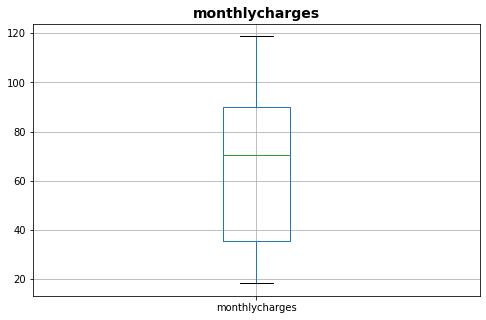

Признак: totalcharges

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64


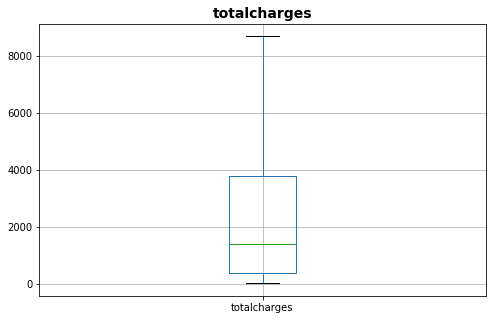

Признак: contractdays

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: contractdays, dtype: float64


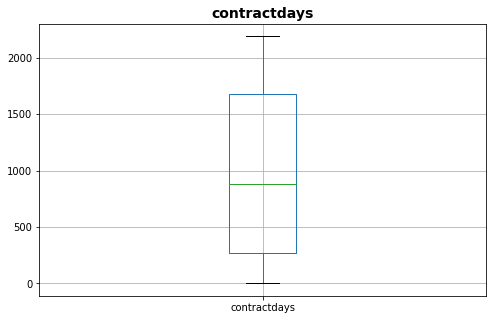

In [26]:
numeric_columns = data[['monthlycharges', 'totalcharges', 'contractdays']]

def boxplot(data):
    
    for i in numeric_columns.columns:
        
        data.boxplot(i, figsize=(8, 5))
        
        print(f'Признак: {i}')
        print()
        print(data[i].describe())
        
        plt.title(i, fontweight='bold', fontsize=14)
        plt.show();
        
boxplot(data)

* Аномальных значений нет


Стоит посмотреть, когда происходили в основном уходы клиентов, и вообще, были ли они постепенными или нет

,enddate,customerid
1,2019-11-01,485
2,2019-12-01,466
3,2020-01-01,460
0,2019-10-01,458


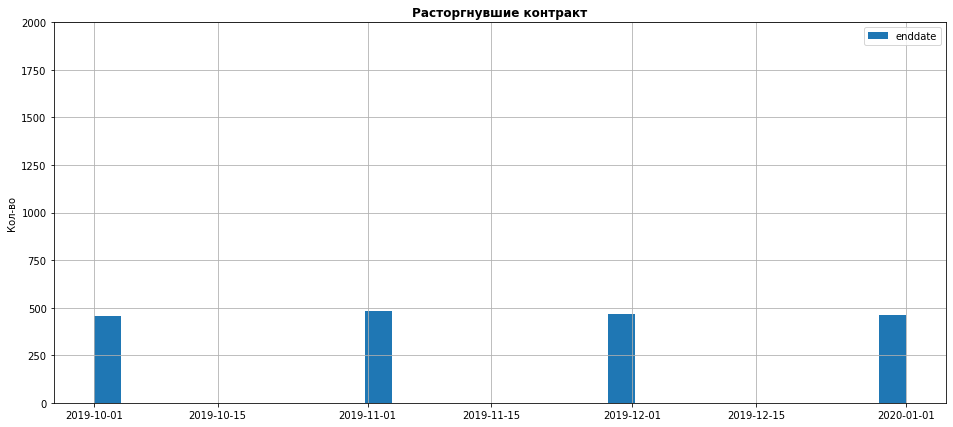

In [27]:
display(data.loc[data['exited'] == 1, :].groupby('enddate')['customerid'].agg('count').reset_index().\
sort_values('customerid', ascending=False)) # ставим ограничение на тех, кто ушел, 
                                            # ведь мы поним, что те, кто остался стоит дата окончания выгрузки данных

data.loc[data['exited'] == 1, 'enddate'].hist(bins=30, figsize=(16, 7), legend=True)
plt.ylabel('Кол-во')
plt.ylim([0, 2000])
plt.title('Расторгнувшие контракт', fontweight='bold')
plt.show();

Массовые уходы были в **2019** году, начиная с `Октября` по `Декабрь`. Посмотрим на средние цены в этом году

In [28]:
data.loc[data['exited'] == 1, :].groupby('enddate')['totalcharges'].agg(['mean', 'count']).reset_index().\
sort_values('mean', ascending=False)

,enddate,mean,count
0,2019-10-01,1619.448035,458
2,2019-12-01,1584.518348,466
3,2020-01-01,1487.655109,460
1,2019-11-01,1440.232577,485


Эти данные не совсем полезны, по ним ничего не понятно

**Посмотрим на кол-во дней клиентов, которые остались, и которые ушли. А также на месячную стоимость, сколько они платили в среднем, сколько максимум/минимум**

In [29]:
data.pivot_table(index='exited', values=['contractdays', 'monthlycharges', 'totalcharges'], \
                 aggfunc=(['mean', 'median', 'min','max'])).T

exited                           0            1
mean   contractdays    1144.447236   547.352060
       monthlycharges    61.265124    74.441332
       totalcharges    2549.999497  1531.796094
median contractdays    1157.000000   304.000000
       monthlycharges    64.425000    79.650000
       totalcharges    1679.525000   703.550000
min    contractdays       0.000000    30.000000
       monthlycharges    18.250000    18.850000
       totalcharges      18.800000    18.850000
max    contractdays    2191.000000  2191.000000
       monthlycharges   118.750000   118.350000
       totalcharges    8672.450000  8684.800000

Произведем визуальную демонстрацию изменения ежемесячной и общей стоимости по годам. Для этого создадим функцию **`graph`**, в которой сгруппируем по решению клиента `exited`, посчитаем средние и суммарные функции по ежемесячной и общей стоимости `monthlycharges`, `totalcharges` по колонке с началом года `begindate`, а затем построим графики по каждому из них

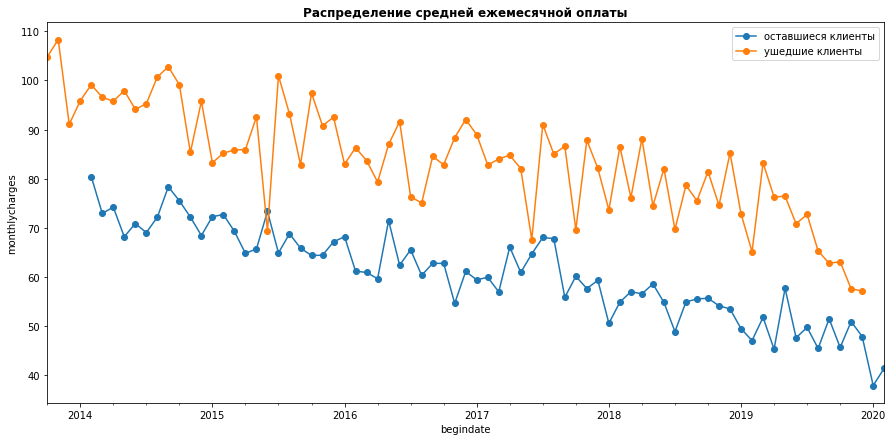

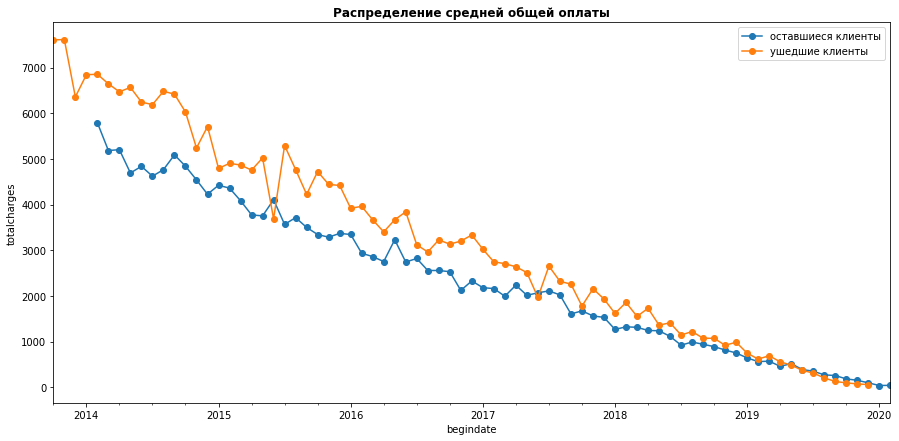

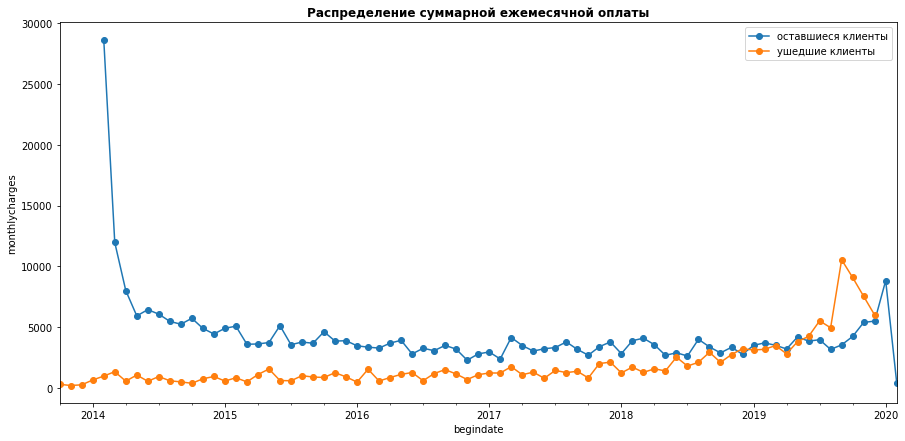

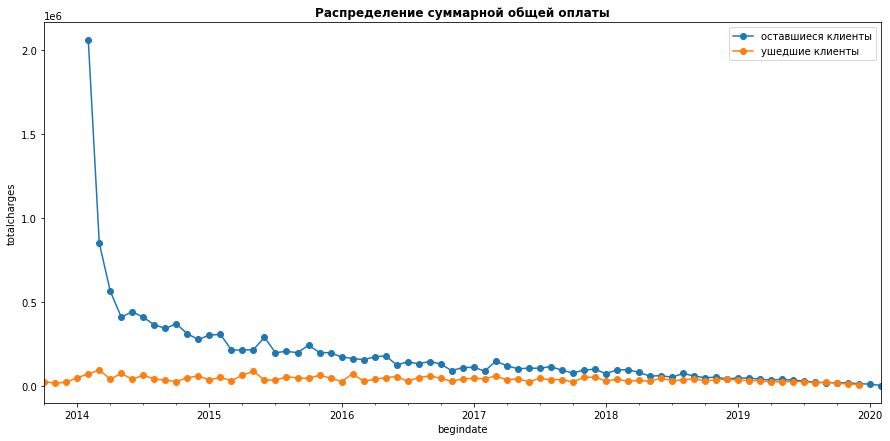

In [30]:
def graph(column, agg, name): # аргумент column несет признак, по которому будем считать среднее значение
                              # аргумен name несет описательный характер
        
    line_table = data.pivot_table(index='exited', values=column, columns='begindate', aggfunc=agg).T 
    # траспортируем, чтобы объекты стали признакими и наоборот для выведения графика

    line_table.plot(kind='line', style='o-', figsize=(15, 7), legend=True)
    plt.legend(['оставшиеся клиенты', 'ушедшие клиенты'])
    plt.title('Распределение' + ' ' + name + ' ' +'оплаты', fontweight='bold')
    plt.ylabel(column)
    plt.show();
    
graph('monthlycharges', 'mean', 'средней ежемесячной')
print()
graph('totalcharges', 'mean', 'средней общей')
print()
graph('monthlycharges', 'sum', 'суммарной ежемесячной')
print()
graph('totalcharges', 'sum', 'суммарной общей')

### Первоначальные выводы

* Видим, что в среднем **клиенты**, которые **ушли**, **платили больше ежемесячно**, причем на регулярной основе из года в год;
* Средняя общая стоимость услуг также больше для ушедших клиентов. начала сраниваться к 2020 году;
* Также суммарная стоимость услуг начала возрастать для ушедших клиентов с начала 2019 года;
* Но для **оставшихся клиентов** общая стоимость услуг **была выше** до 2019 года (и средння, и суммарная);
* Ушедшие клиенты были в среднем чуть больше полтора года (**547 дней**). Но вот медиана составляет даже меньше года - **304 дня**;
* **Минимум 30 дней** потребовалось клиенту, чтобы он ушел


Теперь рассмотрим признаки, с которыми клиенты остаются, и с которыми уходят. 

* Для этого создадим графическую функцию, которая будет отображать оставшихся `stay` и ушедших клиентов `left` и востребованность при этом услуг `feature`. 
* То есть группируем клиентов, которые ушли, и считаем их по определенной услуге `feature`.
* Затем создаем для них график окружности с процентами использования услгу и анализиурем их;
* Также выводим точное кол-во клиентов с данными услугами

ОСТАВШИХСЯ КЛИЕНТОВ


,type,customerid
0,month-to-month,2220
1,two year,1647
2,one year,1307


УШЕДШИХ КЛИЕНТОВ


,type,customerid
0,month-to-month,1655
1,one year,166
2,two year,48


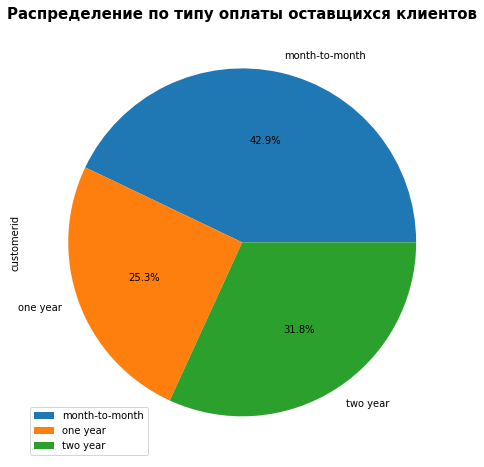

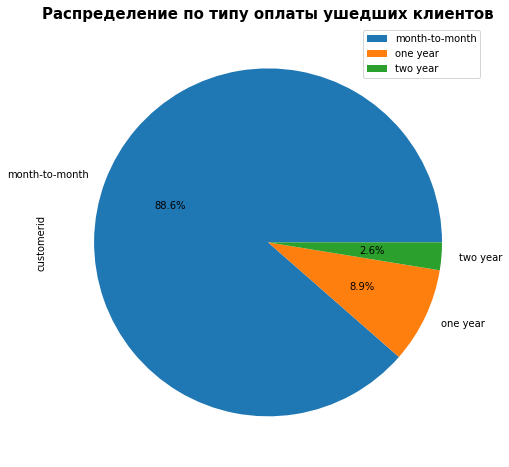

In [31]:
def statistic_graph(feature, name): # feature - принимает значение, по которому будет вестись группировка
                                    # аргумент name носит описательный характер процесса
    
    stay = data.loc[data_contract['exited'] == 0, :].pivot_table(index=feature, values='customerid', 
                                                                          aggfunc='count')
    
    left = data.loc[data_contract['exited'] == 1, :].pivot_table(index=feature, values='customerid', 
                                                                          aggfunc='count')
    
    stay.plot(kind='pie', figsize=(10, 8), autopct='%1.1f%%', legend=True, subplots=True)
    plt.title('Распределение' + ' ' + name + ' ' + 'оставщихся клиентов', fontsize=15, fontweight='bold')
    
    left.plot(kind='pie', figsize=(10, 8), autopct='%1.1f%%', legend=True, subplots=True)
    plt.title('Распределение' + ' ' + name + ' ' + 'ушедших клиентов', fontsize=15, fontweight='bold')
    
    print('ОСТАВШИХСЯ КЛИЕНТОВ')
    stay_table = data.loc[data_contract['exited'] == 0, :].groupby(feature)['customerid'].agg('count').reset_index()
    
    stay_table = stay_table.sort_values('customerid', ascending=False).reset_index(drop=True)
    display(stay_table)
    
    print('УШЕДШИХ КЛИЕНТОВ')
    left_table = data.loc[data_contract['exited'] == 1, :].groupby(feature)['customerid'].agg('count').reset_index()
    
    left_table = left_table.sort_values('customerid', ascending=False).reset_index(drop=True)
    display(left_table)

statistic_graph('type', 'по типу оплаты')

ОСТАВШИХСЯ КЛИЕНТОВ


,paymentmethod,customerid
0,mailed check,1304
1,electronic check,1294
2,credit card (automatic),1290
3,bank transfer (automatic),1286


УШЕДШИХ КЛИЕНТОВ


,paymentmethod,customerid
0,electronic check,1071
1,mailed check,308
2,bank transfer (automatic),258
3,credit card (automatic),232


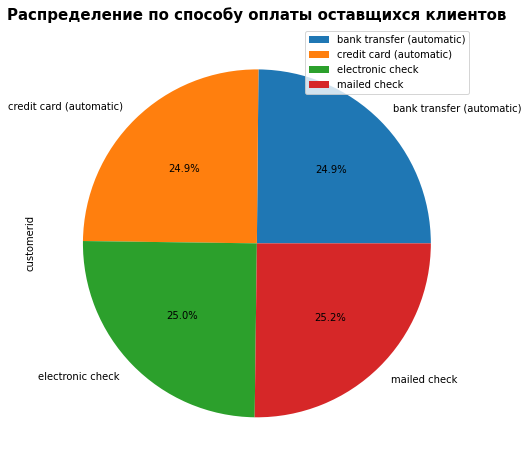

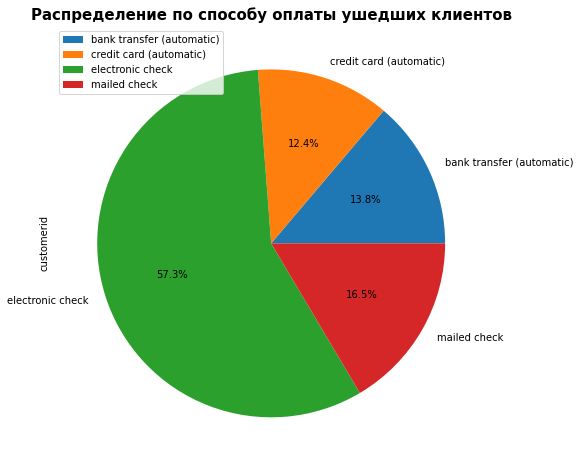

In [32]:
statistic_graph('paymentmethod', 'по способу оплаты')

ОСТАВШИХСЯ КЛИЕНТОВ


,seniorcitizen,customerid
0,0,4508
1,1,666


УШЕДШИХ КЛИЕНТОВ


,seniorcitizen,customerid
0,0,1393
1,1,476


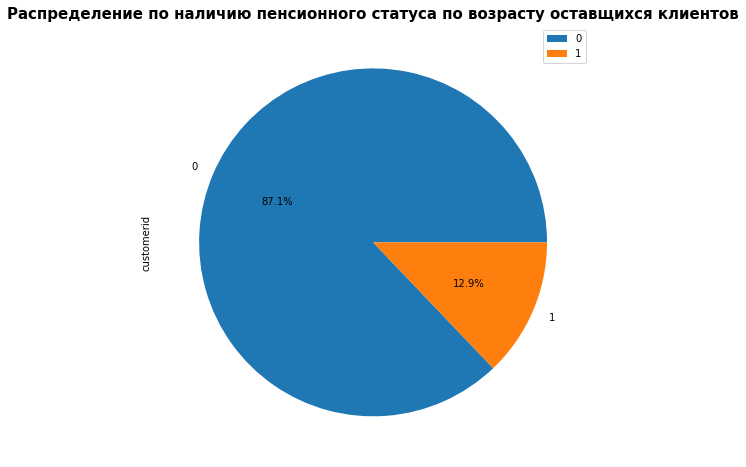

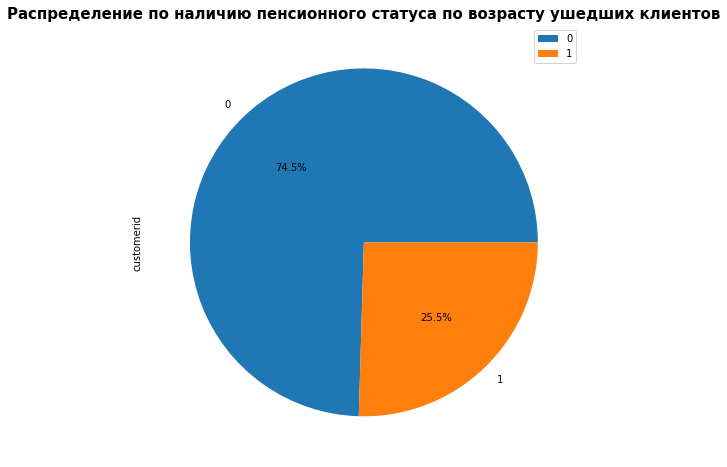

In [33]:
statistic_graph('seniorcitizen', 'по наличию пенсионного статуса по возрасту')

ОСТАВШИХСЯ КЛИЕНТОВ


,paperlessbilling,customerid
0,yes,2771
1,no,2403


УШЕДШИХ КЛИЕНТОВ


,paperlessbilling,customerid
0,yes,1400
1,no,469


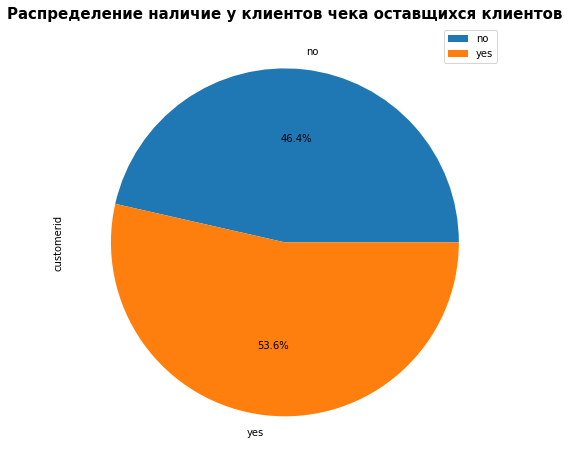

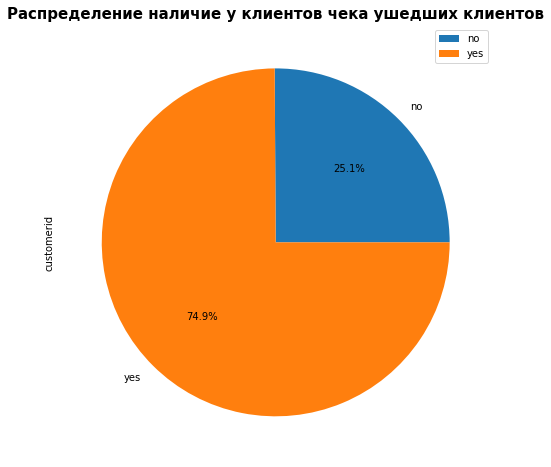

In [34]:
statistic_graph('paperlessbilling', 'наличие у клиентов чека')

ОСТАВШИХСЯ КЛИЕНТОВ


,gender,customerid
0,male,2625
1,female,2549


УШЕДШИХ КЛИЕНТОВ


,gender,customerid
0,female,939
1,male,930


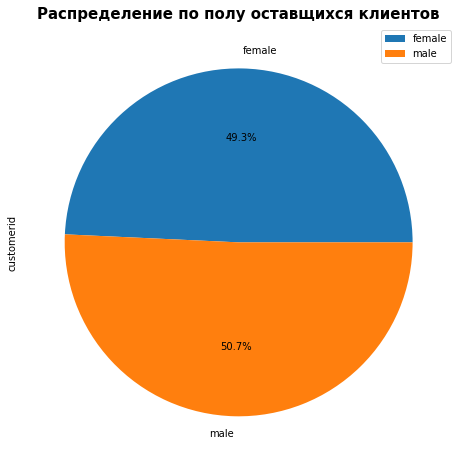

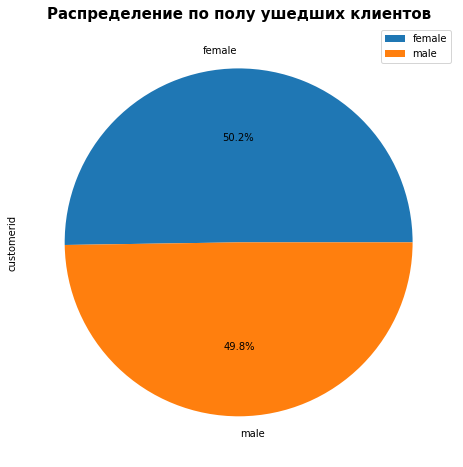

In [35]:
statistic_graph('gender', 'по полу')

ОСТАВШИХСЯ КЛИЕНТОВ


,partner,customerid
0,yes,2733
1,no,2441


УШЕДШИХ КЛИЕНТОВ


,partner,customerid
0,no,1200
1,yes,669


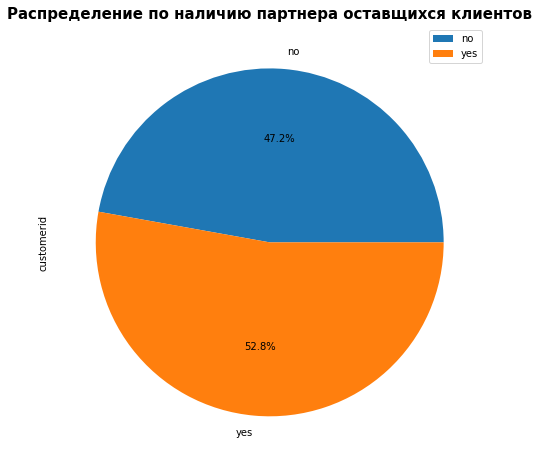

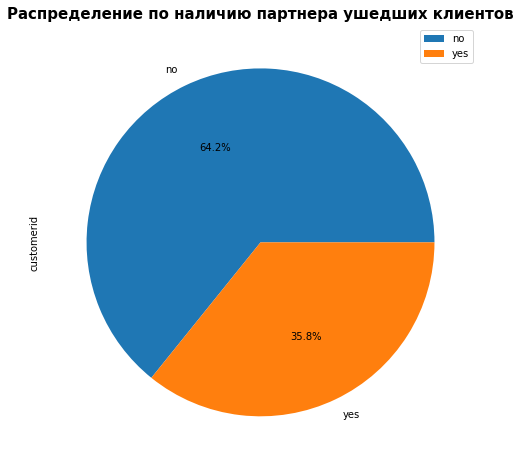

In [36]:
statistic_graph('partner', 'по наличию партнера')

ОСТАВШИХСЯ КЛИЕНТОВ


,dependents,customerid
0,no,3390
1,yes,1784


УШЕДШИХ КЛИЕНТОВ


,dependents,customerid
0,no,1543
1,yes,326


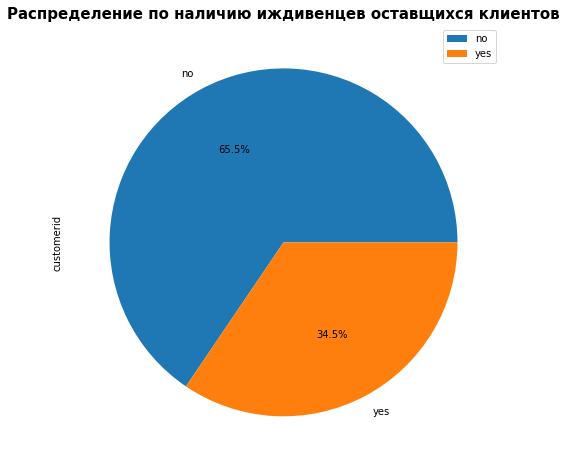

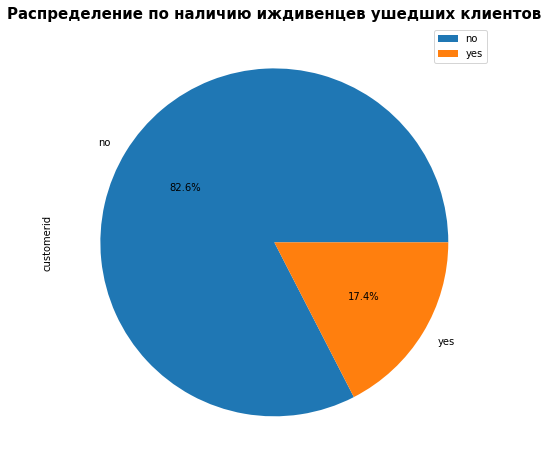

In [37]:
statistic_graph('dependents', 'по наличию иждивенцев')

ОСТАВШИХСЯ КЛИЕНТОВ


,internetservice,customerid
0,dsl,1962
1,fiber optic,1799
2,dont_use,1413


УШЕДШИХ КЛИЕНТОВ


,internetservice,customerid
0,fiber optic,1297
1,dsl,459
2,dont_use,113


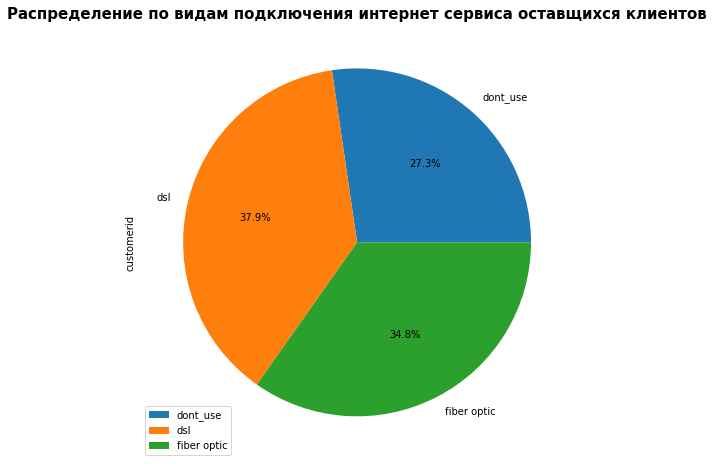

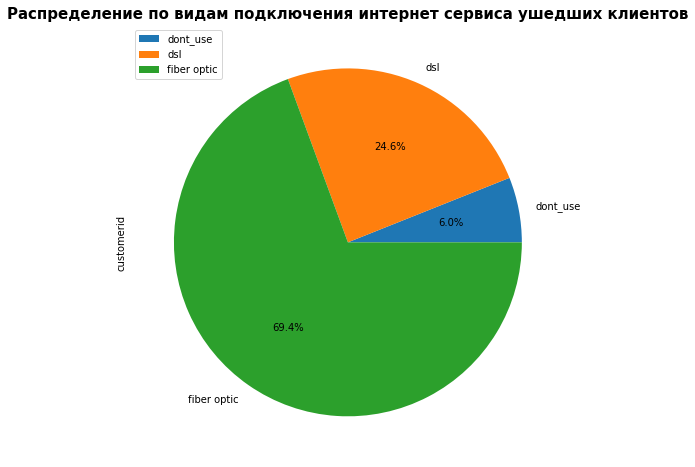

In [38]:
statistic_graph('internetservice', 'по видам подключения интернет сервиса')

ОСТАВШИХСЯ КЛИЕНТОВ


,multiplelines,customerid
0,no,2541
1,yes,2121
2,dont_use,512


УШЕДШИХ КЛИЕНТОВ


,multiplelines,customerid
0,yes,850
1,no,849
2,dont_use,170


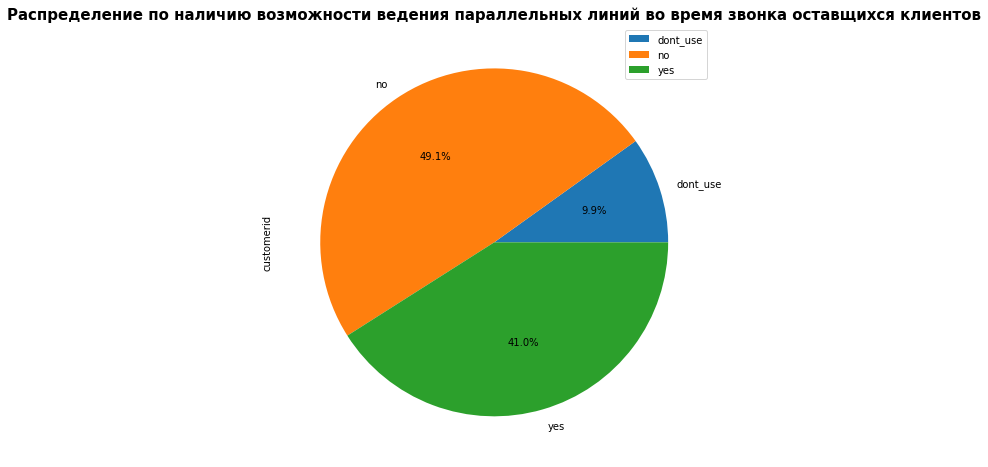

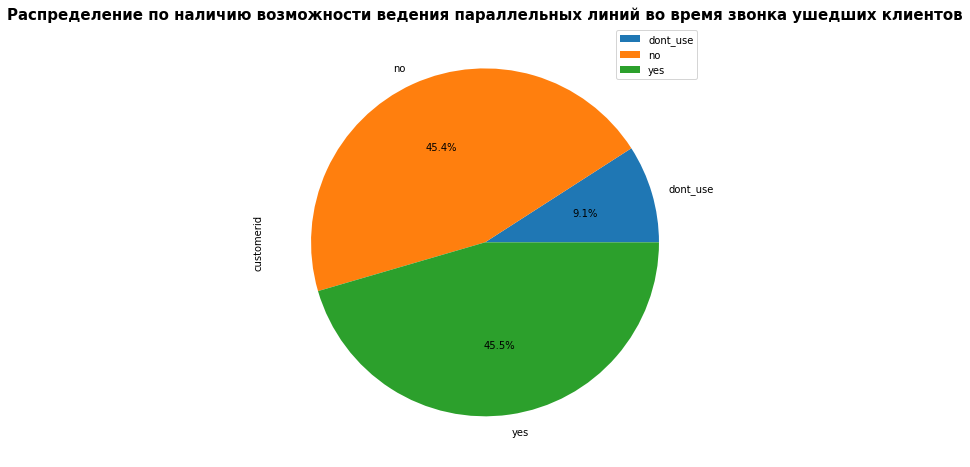

In [39]:
statistic_graph('multiplelines', 'по наличию возможности ведения параллельных линий во время звонка')

### Вывод по признакам

* На решение клиентов с наличием ведения параллельных линий во время звонка **multiplelines**, почти **никак не сказалась** данная функция;


* А вот на ушедших клиентов пришлась большая доля с наличием интернет сервиса **internetservice** - `fiber optic`. У большого процента осташихся клиентов `~27%` вообще нет никакоо интернет сервиса;


* Как ни странно, у клиентов, у которых нет иждивенцев **dependents**, сказалось на уход. Возможно с наличием кого-то (детей) нет времени тратить на поиск лучшего предложения у другого тарифа. Среди ушедших **`~83%`** без иждивенцев;


* Также клиенты с наличием партнера **partner** более лояльны, чем без. То есть снова видим тенденцию, что у ушедших клиентов чаще нет иждивенцев и партнера. Около **`64%`** ушедших клиентов - одиночки;


* Люди с наличием пенсионного статуса **seniorcitizen** чаще уходят, правда почти они равны и оставшимся клиентам;


* Наблюдаем, что гендер **gender** почти никак не влияет;


* Видим, что клиенты, которые ушли, чаще оплачивали за услуги **paymentmethod** электронным чеком - `electronic check`. Среди ушедших, этот способ занял около  **`57%`**. Вероятно, есть какие-то проблемы с этим видом оплаты. У тех, которые остались, наблюдается баланс в способах опаты;


* Видна тенденция, что уходящие клиенты, выбирают чаще всего безбумажный расчётный лист **paperlessbilling**. Почти **`75%`**;


* По типу оплаты **type** от месяца к месяцу `month-to-month` чаще уходят клиенты. Ранее заметили, что среди ушедших, средняя ежемесячная оплата на порядок была выше, чем у тех, кто остался

## Подготовка к обучению моделей

* Как было указано ранее, чтобы модель не знала ответы наперед и нормально предсказывала, стоит удалить столбцы с началом действия контракта **`begindate`** и с расторжением **`enddate`**. Также колонку с `ID` клиента **`customerid`**, она не нужна модели

In [41]:
data_for_learning = data.drop(['customerid', 'begindate', 'enddate'], axis=1)
data_for_learning

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,contractdays,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,month-to-month,yes,electronic check,29.85,29.85,0,31,female,0,yes,no,dsl,no,yes,no,no,no,no,dont_use
1,one year,no,mailed check,56.95,1889.50,0,1036,male,0,no,no,dsl,yes,no,yes,no,no,no,no
2,month-to-month,yes,mailed check,53.85,108.15,1,61,male,0,no,no,dsl,yes,yes,no,no,no,no,no
3,one year,no,bank transfer (automatic),42.30,1840.75,0,1371,male,0,no,no,dsl,yes,no,yes,yes,no,no,dont_use
4,month-to-month,yes,electronic check,70.70,151.65,1,61,female,0,no,no,fiber optic,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,one year,yes,mailed check,84.80,1990.50,0,730,male,0,yes,yes,dsl,yes,no,yes,yes,yes,yes,yes
7039,one year,yes,credit card (automatic),103.20,7362.90,0,2191,female,0,yes,yes,fiber optic,no,yes,yes,no,yes,yes,yes
7040,month-to-month,yes,electronic check,29.60,346.45,0,337,female,0,yes,yes,dsl,yes,no,no,no,no,no,dont_use
7041,month-to-month,yes,mailed check,74.40,306.60,1,123,male,1,yes,no,fiber optic,no,no,no,no,no,no,yes


Наблюдаем, что колонка `'seniorcitizen'` имеет тип данных целочисленный, являясь количественным признаком. Для удобства, поменяем значения на строковые `yes` - 1, `no` - 0, а потом занесем его в категориальные признаки для кодирования

In [42]:
#data['seniorcitizen'] = data['seniorcitizen'].astype('str')
display(data_for_learning.loc[data_for_learning['seniorcitizen'] == 0, 'seniorcitizen'].count())
data_for_learning['seniorcitizen'] = data_for_learning['seniorcitizen'].replace(0, 'no')
data_for_learning['seniorcitizen'] = data_for_learning['seniorcitizen'].replace(1, 'yes')
#data['seniorcitizen'].apply(lambda i: 'no' if i == '0' else 'yes')
data_for_learning.loc[data_for_learning['seniorcitizen'] == 'no', 'seniorcitizen'].count()

5901

5901

* Рассмотрим корреляцию всех признаков между собой. Для этого мы загрузили библиотеку **phik**. Эта библиотека работает со всеми признаками (то есть не только количественными). Там можно и категориальные подавать

In [43]:
phik_corr = data_for_learning.phik_matrix()
phik_corr.round(2)

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'exited', 'contractdays']


,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,contractdays,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
type,1.00,0.11,0.28,0.39,0.51,0.25,0.66,0.00,0.09,0.18,0.15,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.24
paperlessbilling,0.11,1.00,0.37,0.47,0.21,0.30,0.00,0.00,0.24,0.01,0.17,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.10
paymentmethod,0.28,0.37,1.00,0.40,0.35,0.45,0.38,0.00,0.29,0.24,0.22,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.17
monthlycharges,0.39,0.47,0.40,1.00,0.76,0.36,0.41,0.01,0.30,0.20,0.18,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.71
totalcharges,0.51,0.21,0.35,0.76,1.00,0.28,0.84,0.00,0.15,0.42,0.11,0.51,0.53,0.57,0.57,0.54,0.57,0.57,0.49
exited,0.25,0.30,0.45,0.36,0.28,1.00,0.47,0.00,0.23,0.23,0.25,0.20,0.21,0.18,0.17,0.21,0.14,0.14,0.02
contractdays,0.66,0.00,0.38,0.41,0.84,0.47,1.00,0.00,0.03,0.49,0.21,0.02,0.37,0.40,0.40,0.36,0.32,0.33,0.37
gender,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
seniorcitizen,0.09,0.24,0.29,0.30,0.15,0.23,0.03,0.00,1.00,0.02,0.32,0.16,0.13,0.11,0.11,0.14,0.11,0.11,0.09
partner,0.18,0.01,0.24,0.20,0.42,0.23,0.49,0.00,0.02,1.00,0.65,0.00,0.09,0.09,0.10,0.08,0.08,0.08,0.09


Чтобы было более четко видны зависимости, и более лучше воспринималось визуально, продемонстрируем в цвете корррелирующие признаки при помощи функции **plot_correlation_matrix**

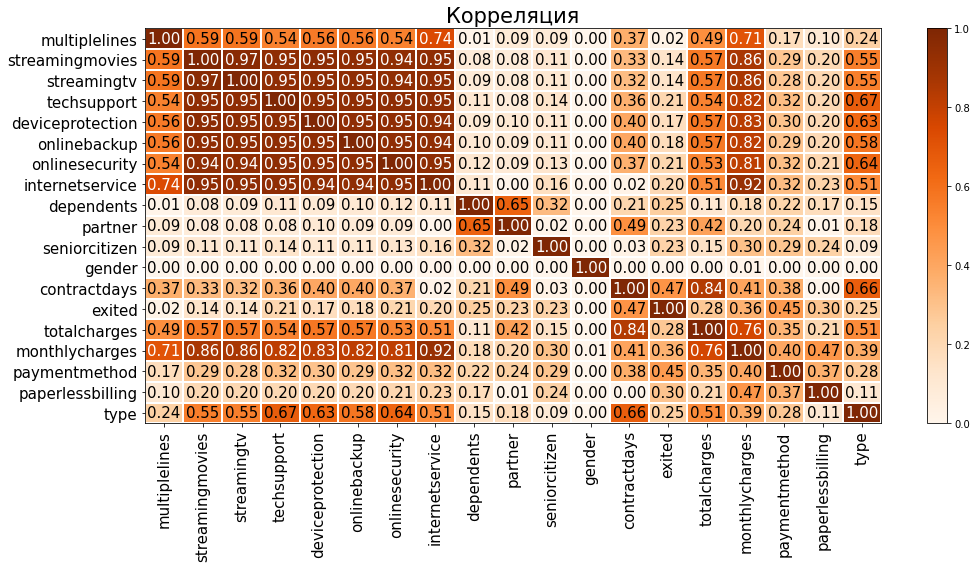

In [44]:
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='Oranges', 
                        title=r'Корреляция', 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout();

* Замечаем, что пол **`gender`** вообще никак не коррелирует с целевые признаком **`exited`**, да и вообше ни с каким признаком. Стоит удалить его из выборки;
* Больше всего коррелируют с целевым признаком **`exited`** наш созданный признак с днями на контракте **`contractdays`**. Также хорошо коррелируют такие признаки как: `type`, `paperlessbilling`, `paymentmethod`, `monthlycharges` и `totalcharges`. В принципе, последний тоже можно удалить, так как его можно будет восстановить при помощи `monthlycharges` и `contractdays`. Стоит его удалить;


* Видим, что `очень сильная корреляция` между различными `услугами интернета` (не меньше **0.92**). Можно сказать, что они все между собой заменяемы. Возможно, будем их устранять при обучении

In [45]:
data_for_learning = data_for_learning.drop(['gender', 'totalcharges'], axis=1)
data_for_learning.columns

Index(['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'exited',
       'contractdays', 'seniorcitizen', 'partner', 'dependents',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object')

* Чтобы **не** произошла **утечка данных**, нужно до кодирования и масштабирования разбить на обучающую и тестовую выборки. 

* Также вносим фиксированное константное значение **random_state** равным `121222`

In [46]:
RANDOM_STATE=121222

features = data_for_learning.drop('exited', axis=1)
target = data_for_learning['exited']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                            random_state=RANDOM_STATE)

print(f'Train выборка: {features_train.shape}, {target_train.shape}') # проверяем разделение/размер выборок
print(f'Test выборка: {features_test.shape}, {target_test.shape}')

Train выборка: (5282, 16), (5282,)
Test выборка: (1761, 16), (1761,)


Проверим, какое соотношение между классами **0** и **1**. Смотреть будем на обучающей и тестовой выборках, используя метод вывода относительных частот `.value_counts(normalize=True)`

,exited
0,0.735138
1,0.264862


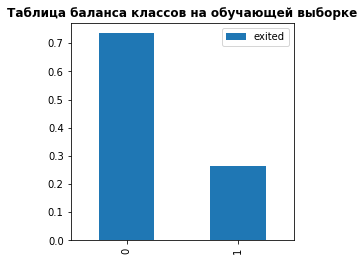

In [47]:
ttvc = target_train.value_counts(normalize=True).to_frame()
display(ttvc)
ttvc.plot(kind='bar', figsize=(4, 4))
plt.title('Таблица баланса классов на обучающей выборке', fontweight='bold');

,exited
0,0.733106
1,0.266894


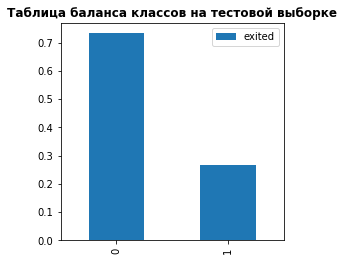

In [48]:
ttevc = target_test.value_counts(normalize=True).to_frame()
display(ttevc)
ttevc.plot(kind='bar', figsize=(4, 4))
plt.title('Таблица баланса классов на тестовой выборке', fontweight='bold');

**Наблюдается дисбаланс классов** на двух выборках. Если мы будем прогнозировать, что клиент НЕ уйдет, то в почти **74%** будем правы. Но метрика **AUC-ROC** не чувствительна к дисбалансу. Для других метрик баланс необходим. И чтобы этого избежать, стоит применить техники **upsampling** и **downsampling** - увеличения и уменьшения меньшего и большего класса соответственно. Но здесь она неуместна, так как при `увеличении` произойдет **утечка данных**, а `уменьшенную выборку` не совсем правильно применять на чуть более 7000 строк, делая около 2000. Но в рамках учебного целей, мы создадим и проверим на этих выборках.

#### **ВАЖНО**: 

`Применять эти выборки будем только ради учебного процесса и только в рамках дополнительного исследования, финальную же метрику будем проводить на обучающей выборке!`


**Техника `upsampling`:**

* Разделим обучающую выборку на отрицательные и положительные объекты;
* Скопируем несколько раз положительные объекты;
* С учётом полученных данных создадим новую обучающую выборку;
* Перемешаем данные

In [49]:
def upsample(features, target, repeat):
    
    features_zero = features[target==0]
    features_one = features[target==1]
    target_zero = target[target==0]
    target_one = target[target==1]
    
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)
display(target_upsampled.value_counts(normalize=True))

1    0.519431
0    0.480569
Name: exited, dtype: float64

* Увеличили класс "1" в **3 раза**

**Методика уменьшения отрицательного класса**

* Разделяем обучающую выборку на отрицательные и положительные объекты;
* Случайным образом отбросываем часть из отрицательных объектов;
* С учётом полученных данных создаем новую обучающую выборку;
* Перемешиваем данные

In [50]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
    
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.36)
display(target_downsampled.value_counts(normalize=True))

1    0.500179
0    0.499821
Name: exited, dtype: float64

**Приступаем к кодированию и к масштабации данных**. Но стоит отметить, что масштабирование признаков требуется в основном для линейных моделей. Для моделей решающих деревьев и бустингов масштабирование не рекомендуется, а в некоторых случаях может даже ухудшить качество. Но здесь проведем анализ и посмотрим на результаты.


* Выводим только категориальные признаки, имеющий соотвественный строковый **str** тип данных в переменную **ohe_features**;
* А также выводим количественные признаки в переменную **numeric_list**

In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7043 non-null   object 
 1   paperlessbilling  7043 non-null   object 
 2   paymentmethod     7043 non-null   object 
 3   monthlycharges    7043 non-null   float64
 4   contractdays      7043 non-null   int64  
 5   seniorcitizen     7043 non-null   object 
 6   partner           7043 non-null   object 
 7   dependents        7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  multiplelines     7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [52]:
ohe_features = features.select_dtypes(include='object').columns.to_list()
display(ohe_features)
#numeric_list = numeric_columns.columns.to_list()
numeric_list = ['monthlycharges', 'contractdays']
numeric_list

['type',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'multiplelines']

['monthlycharges', 'contractdays']

**Делаем отдельные тестовые выборки для увеличенной и для уменьшенной выборок (т.к. каждая будет подстраивается под ту выборку, по которой обучается)**.

* Заведем функцию, которая будет масштабировать количественные признаки

In [53]:
features_test_for_up = features_test.copy()
features_test_for_down = features_test.copy()

In [54]:
def scale(features_train, features_test):
    
    scaler = StandardScaler()

    scaler.fit(features_train[numeric_list]) # всегда обучаемся на обучающей выборке

    features_train[numeric_list] = scaler.transform(features_train[numeric_list])
    features_test[numeric_list] = scaler.transform(features_test[numeric_list])
    
    return features_train[numeric_list], features_test[numeric_list]

In [55]:
display(features_train.shape)
display(features_upsampled.shape)
display(features_downsampled.shape)

(5282, 16)

(8080, 16)

(2797, 16)

* Теперь передаем категориальные признаки в обучение **OHE**

In [56]:
def coder(features_train, features_test):
        
    ohe_encoder = OneHotEncoder(drop='first')

    ohe_encoder.fit(features_train[ohe_features]) # всегда обучаемся на обучающей выборке
    new_columns = ohe_encoder.get_feature_names(ohe_features) # создаем и сохраянем в переменной новые названия колонок
    
    features_train = pd.DataFrame(ohe_encoder.transform(features_train[ohe_features]).toarray(), 
                                  columns=new_columns, index=features_train.index)
    features_test = pd.DataFrame(ohe_encoder.transform(features_test[ohe_features]).toarray(), 
                                 columns=new_columns, index=features_test.index)
    
    return features_train, features_test

### Для upsampling

In [57]:
features_up_ohe, features_test_up_ohe = coder(features_upsampled, features_test_for_up)

print(f'up: {features_up_ohe.shape}, {target_upsampled.shape}')
print(f'test up: {features_test_up_ohe.shape}, {target_test.shape}')

up: (8080, 25), (8080,)
test up: (1761, 25), (1761,)


In [58]:
features_up_scale, features_test_up_scale = scale(features_upsampled, features_test_for_up)
display(features_up_scale.head())
display(features_test_up_scale.head())
features_up_ohe.head()

,monthlycharges,contractdays
4216,0.853079,1.879036
1101,-1.657620,-0.301092
4461,0.929795,0.075363
4944,-1.504188,-0.720294
1686,-0.261043,-0.051501


,monthlycharges,contractdays
176,0.241097,-0.512072
5084,-1.631467,-0.216976
3412,-0.280222,-1.056759
4649,1.444140,1.879036
6482,1.182609,-1.100886


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,deviceprotection_no,deviceprotection_yes,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes
4216,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4461,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4944,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1686,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


* Так как при методе джойне `.join()` получается удвоение строк, приняли решение сбросить индексы и потом присоединить, так как строки соответствуют друг другу

In [59]:
features_up_ohe.reset_index(drop=True, inplace=True)
display(features_up_ohe)

features_up_scale.reset_index(drop=True, inplace=True)
display(features_up_scale)

features_up_ohe_all = features_up_ohe.join(features_up_scale)
features_up_ohe_all

,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,deviceprotection_no,deviceprotection_yes,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8076,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8077,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8078,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


,monthlycharges,contractdays
0,0.853079,1.879036
1,-1.657620,-0.301092
2,0.929795,0.075363
3,-1.504188,-0.720294
4,-0.261043,-0.051501
...,...,...
8075,0.063255,-0.972643
8076,-1.668081,-0.638936
8077,1.234915,1.670814
8078,-0.941024,0.286343


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.853079,1.879036
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.657620,-0.301092
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.929795,0.075363
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.504188,-0.720294
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.261043,-0.051501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.063255,-0.972643
8076,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.668081,-0.638936
8077,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.234915,1.670814
8078,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.941024,0.286343


In [60]:
features_test_up_ohe.reset_index(drop=True, inplace=True)
display(features_test_up_ohe)

features_test_up_scale.reset_index(drop=True, inplace=True)
display(features_test_up_scale)

features_test_up_ohe_all = features_test_up_ohe.join(features_test_up_scale)
features_test_up_ohe_all

,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,deviceprotection_no,deviceprotection_yes,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1757,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


,monthlycharges,contractdays
0,0.241097,-0.512072
1,-1.631467,-0.216976
2,-0.280222,-1.056759
3,1.444140,1.879036
4,1.182609,-1.100886
...,...,...
1756,0.887950,-0.761663
1757,-1.460600,-0.427956
1758,0.472988,-1.100886
1759,0.258532,-0.176986


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.241097,-0.512072
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.631467,-0.216976
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.280222,-1.056759
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.444140,1.879036
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.182609,-1.100886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.887950,-0.761663
1757,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.460600,-0.427956
1758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.472988,-1.100886
1759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.258532,-0.176986


### Для downsampling

In [61]:
features_down_ohe, features_test_down_ohe = coder(features_downsampled, features_test_for_down)

In [62]:
features_down_scale, features_test_down_scale = scale(features_downsampled, features_test_for_down)
display(features_down_scale.head())
display(features_test_down_scale.head())

,monthlycharges,contractdays
3457,-1.693080,-1.117914
3860,-1.489501,-0.366530
5989,0.920386,-1.034427
126,0.344449,-0.035318
6179,0.939526,-0.703216


,monthlycharges,contractdays
176,0.219170,-0.534873
5084,-1.649580,-0.241983
3412,-0.301087,-1.075486
4649,1.419763,1.838352
6482,1.158765,-1.119283


* Для **downsampled** работает метод `.join()`, поэтому тут индексы сбрасывать не будем

In [63]:
features_down_ohe_all = features_down_ohe.join(features_down_scale)
features_test_down_ohe_all = features_test_down_ohe.join(features_test_down_scale)

display(features_down_ohe_all.head())
display(features_test_down_ohe_all.head())

,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
3457,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.693080,-1.117914
3860,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.489501,-0.366530
5989,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.920386,-1.034427
126,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.344449,-0.035318
6179,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.939526,-0.703216


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
176,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.219170,-0.534873
5084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.649580,-0.241983
3412,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.301087,-1.075486
4649,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.419763,1.838352
6482,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.158765,-1.119283


### Для train

In [64]:
features_train_ohe, features_test_ohe = coder(features_train, features_test)

In [65]:
display(features_train.head())
display(features_test.head())

,type,paperlessbilling,paymentmethod,monthlycharges,contractdays,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
371,month-to-month,yes,electronic check,85.65,61,no,no,no,fiber optic,no,no,no,no,yes,no,yes
5715,month-to-month,yes,credit card (automatic),108.15,974,no,no,no,fiber optic,yes,yes,no,yes,yes,yes,yes
1444,two year,yes,electronic check,111.15,1248,no,no,yes,fiber optic,yes,yes,yes,yes,yes,yes,no
4928,month-to-month,no,electronic check,46.00,122,yes,yes,yes,dsl,no,no,no,no,no,no,no
6915,two year,yes,electronic check,97.85,2191,no,yes,no,fiber optic,no,no,yes,no,yes,yes,yes


,type,paperlessbilling,paymentmethod,monthlycharges,contractdays,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
176,month-to-month,yes,mailed check,74.45,457,yes,no,no,fiber optic,no,no,no,no,no,no,yes
5084,one year,no,bank transfer (automatic),20.75,671,no,yes,yes,dont_use,dont_use,dont_use,dont_use,dont_use,dont_use,dont_use,no
3412,two year,no,mailed check,59.50,62,no,yes,yes,dsl,yes,yes,no,yes,no,no,no
4649,two year,yes,credit card (automatic),108.95,2191,no,yes,no,fiber optic,yes,yes,no,yes,yes,yes,yes
6482,month-to-month,yes,electronic check,101.45,30,no,no,no,fiber optic,no,no,yes,no,yes,yes,yes


Так как для моделей **бустинга** и **деревьев** не особо рекомендована масштабация данных, проведем присоединение к закодированной **OHE** обучающей и тестовой выборке количественных признаков `без масштабации`

In [66]:
features_train_ohe_nn = features_train_ohe.join(features_train[numeric_list])
features_test_ohe_nn = features_test_ohe.join(features_test[numeric_list])

display(features_train_ohe_nn.head())
display(features_test_ohe_nn.head())

,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
371,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,85.65,61
5715,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,108.15,974
1444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,111.15,1248
4928,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,46.00,122
6915,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,97.85,2191


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
176,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,74.45,457
5084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.75,671
3412,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,59.50,62
4649,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,108.95,2191
6482,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,101.45,30


In [67]:
features_train_scale, features_test_scale = scale(features_train, features_test)
display(features_train_scale.head())
display(features_test_scale.head())

/tmp/ipykernel_48/154525264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric_list] = scaler.transform(features_train[numeric_list])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_48/154525264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,monthlycharges,contractdays
371,0.717486,-1.229095
5715,1.467257,-0.004084
1444,1.567226,0.363553
4928,-0.603775,-1.147248
6915,1.124028,1.628815


,monthlycharges,contractdays
176,0.344267,-0.697765
5084,-1.445184,-0.410632
3412,-0.153913,-1.227753
4649,1.493915,1.628815
6482,1.243992,-1.270689


* Для **train** выборки также отлично подходит метод `.join()`

In [68]:
features_train_ohe_all = features_train_ohe.join(features_train_scale)
features_test_ohe_all = features_test_ohe.join(features_test_scale)

display(features_train_ohe_all.head())
display(features_test_ohe_all.head())

,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
371,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.717486,-1.229095
5715,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.467257,-0.004084
1444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.567226,0.363553
4928,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.603775,-1.147248
6915,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.124028,1.628815


,type_one year,type_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,seniorcitizen_yes,partner_yes,dependents_yes,internetservice_dsl,...,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes,multiplelines_no,multiplelines_yes,monthlycharges,contractdays
176,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.344267,-0.697765
5084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.445184,-0.410632
3412,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.153913,-1.227753
4649,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.493915,1.628815
6482,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.243992,-1.270689


* Все наборы выборок готовы к обучения

## Обучение моделей

Теперь приступаем к обучению моделей

Параметры будем подбирать с помощью **GridSearchCV**

В условиях к зачету сказано, что для `обучения моделей предсказывать отток клиентов применятся метрика` **AUC-ROC**. Значение метрики **AUC-ROC** должно быть `не меньше` **0.75** по поставленным условиям


* Создаем функцию для рассчитывания параметров и лучшего значения для **AUC-ROC**. Считать будем при помощи **`GridSearchCV()`**. Эта техника обучает модель с заданными нами в перечни параметрами, из которых выберет лучшие для встроенной расчетной метрики **AUC-ROC**, используя кросс валидацию (после проведем финальную проверку на тестовой). 


* Лучшее значение **AUC-ROC** выводим с помощью атрибута `.best_score_`, а лучшие параметры с помощью `.best_params_`


* Также выведем дополнительную метрику точности **accuracy** лучшей модели при помощи атрибута `best_estimator_`

На вход функция принимает **6 аргументов**: `сама модель`, `перечень параметров`, `признаки`, `целевой признак`, `название модели` и `описание, какая выборка используется`. С ее помощью мы найдем лучшие гиперпараметры для значения **AUC-ROC**

In [69]:
def best_model(model, params, features, target, model_name, describe):
    
    cvs = GridSearchCV(model, params, scoring='roc_auc', cv=5)
    
    cvs.fit(features, target)
    
    print(f'Лучшие параметры модели {model_name} {describe}: {cvs.best_params_}')
    print()
    print(f'Лучший auc_roc модели {model_name} {describe}: {round(abs(cvs.best_score_), 4)}')
    print()
    
    accuracy = cross_val_score(cvs.best_estimator_, features, target, scoring='accuracy', cv=5).mean()
    print(f'accuracy {model_name}: {round(accuracy, 4)}')
    print()
    
    auc_roc = cvs.best_score_
    
    return auc_roc

* Для проверки баланса предсказания, вводим функцию частоты `class_frequency` для подсчета относительных частот. Переводим таблицу в тип `Series`, чтобы смогла `value_counts(normalize=True)` выявить классы;


* Выводим **матрицу ошибок** `confusion_matrix` для проверки баланса

In [70]:
def class_frequency(model, features, target, model_name):
    
    model.fit(features, target)
    pred = model.predict(features)
    
    print(f'Относительные частоты модели {model_name} для проверки баланса:')
    print(pd.Series(pred).value_counts(normalize=True))
    print()
    print('Матрица ошибок для выявления баланса')
    print(confusion_matrix(target, pred))

### CatBoost

Начнем с модели **CatBoost**

* На обучающей выборке

In [71]:
%%time

model_cbc = CatBoostClassifier(learning_rate=0.1, verbose=False, random_state=RANDOM_STATE)

params_cbc = {'iterations': range(100, 1001, 150), 'max_depth': range(1, 5)}

auc_cbc = best_model(model_cbc, params_cbc, features_train_ohe_nn, target_train, 'CatBoostClassifier', 
                     'на обучающей выборке')

Лучшие параметры модели CatBoostClassifier на обучающей выборке: {'iterations': 850, 'max_depth': 4}

Лучший auc_roc модели CatBoostClassifier на обучающей выборке: 0.9258

accuracy CatBoostClassifier: 0.8794

CPU times: user 1min 34s, sys: 8.24 s, total: 1min 43s
Wall time: 3min 2s


In [72]:
cross_val_score(model_cbc, features_train_ohe_nn, target_train, scoring='accuracy', cv=5).mean()

0.8691782417361887

In [73]:
class_frequency(model_cbc, features_train_ohe_all, target_train, 'CatBoostClassifier')

Относительные частоты модели CatBoostClassifier для проверки баланса:
0    0.743847
1    0.256153
dtype: float64

Матрица ошибок для выявления баланса
[[3864   19]
 [  65 1334]]


Модель на обучющей выборке показала очень хороший результат. Правда, баланс классов при предсказании не учтен. Предсказывала модель часто, что клиент не уйдет чаще, чем уйдет. Матрица ошибок показывает, что много ответов оказались верны при предсказывании **TP**. Но баланса нет. При этом точность **accuracy** достаточно большая


* Теперь рассмотрим на увеличенной обучающей выборке **upsampled**

In [74]:
%%time

model_cbc_up = CatBoostClassifier(learning_rate=0.1, verbose=False, random_state=RANDOM_STATE)

params_cbc_up = {'iterations': range(100, 1001, 150), 'max_depth': range(1, 5)}

auc_cbc_up = best_model(model_cbc_up, params_cbc_up, features_up_ohe_all, target_upsampled, 'CatBoostClassifier', 
                        'на увеличенной выборке техникой upsampling')

Лучшие параметры модели CatBoostClassifier на увеличенной выборке техникой upsampling: {'iterations': 1000, 'max_depth': 4}

Лучший auc_roc модели CatBoostClassifier на увеличенной выборке техникой upsampling: 0.9687

accuracy CatBoostClassifier: 0.9074

CPU times: user 2min 2s, sys: 8.92 s, total: 2min 11s
Wall time: 3min 28s


In [75]:
class_frequency(model_cbc_up, features_up_ohe_all, target_upsampled, 'CatBoostClassifier')

Здесь наблюдаем очень хороший баланс. Видим, что баланс классов на выборке **upsampled** соблюден. Также матрица ошибок показывает, что **модель почти не ошибалась**


* На уменьшенной выборке **downsampled**

In [76]:
%%time

model_cbc_down = CatBoostClassifier(learning_rate=0.1, verbose=False, random_state=RANDOM_STATE)

params_cbc_down = {'iterations': range(100, 1001, 150), 'max_depth': range(1, 5)}

auc_cbc_down = best_model(model_cbc_down, params_cbc_down, features_down_ohe_all, target_downsampled, 
                          'CatBoostClassifier', 'на уменьшенной выборке техникой downsampling')

Лучшие параметры модели CatBoostClassifier на уменьшенной выборке техникой downsampling: {'iterations': 1000, 'max_depth': 3}

Лучший auc_roc модели CatBoostClassifier на уменьшенной выборке техникой downsampling: 0.906

accuracy CatBoostClassifier: 0.8244

CPU times: user 1min 4s, sys: 6.32 s, total: 1min 11s
Wall time: 2min 24s


In [77]:
class_frequency(model_cbc_down, features_down_ohe_all, target_downsampled, 'CatBoostClassifier')

Относительные частоты модели CatBoostClassifier для проверки баланса:
1    0.503754
0    0.496246
dtype: float64

Матрица ошибок для выявления баланса
[[1386   12]
 [   2 1397]]


Снова видим соблюдения классов при предсказывании на выборке **downsampled**. Результат модель дала чуть хуже, чем на других выборках. Матрица ошибок показывает почти равные показатели **TP** и **TN**, то есть верно-позитивные и верно-негативные, при этом ошибок мало.


### LightGBM

Приступим теперь к модели **LightGBM**

* Сперва посмотрим на обучающей выборке с балансом в параметрах `class_weight='balanced'`

In [78]:
%%time

model_lgbm = LGBMClassifier(learning_rate=0.1, class_weight='balanced', random_state=RANDOM_STATE)

params_lgbm = {'n_estimators': range(250, 251)}

auc_lgbm = best_model(model_lgbm, params_lgbm, features_train_ohe_nn, target_train, 'LGBMClassifier', 
                      'на обучающей выборке')
print(auc_lgbm)

Лучшие параметры модели LGBMClassifier на обучающей выборке: {'n_estimators': 250}

Лучший auc_roc модели LGBMClassifier на обучающей выборке: 0.8957

accuracy LGBMClassifier: 0.8376

0.8957250172639265
CPU times: user 10min 23s, sys: 5.43 s, total: 10min 29s
Wall time: 10min 37s


In [79]:
class_frequency(model_lgbm, features_train_ohe_nn, target_train, 'LGBMClassifier')

Относительные частоты модели LGBMClassifier для проверки баланса:
0    0.666982
1    0.333018
dtype: float64

Матрица ошибок для выявления баланса
[[3463  420]
 [  60 1339]]


Отличный результат выдает обучающая выборка с параметром `class_weight='balanced'`. Матрица ошибок говорит о том, что модель лучше предсказывет тех, кто останется. 


* Теперь возьмем на выборке **upsampled**

In [80]:
%%time

model_lgbm_up = LGBMClassifier(learning_rate=0.1, random_state=RANDOM_STATE)

params_lgbm_up = {'n_estimators': range(100, 1001, 150)}

auc_lgbm_up = best_model(model_lgbm_up, params_lgbm_up, features_up_ohe_all, target_upsampled, 'LGBMClassifier', 
                         'на увеличенной выборке техникой upsampling')
print(auc_lgbm_up)

Лучшие параметры модели LGBMClassifier на увеличенной выборке техникой upsampling: {'n_estimators': 1000}

Лучший auc_roc модели LGBMClassifier на увеличенной выборке техникой upsampling: 0.9863

accuracy LGBMClassifier: 0.9444

0.9863124596087369
CPU times: user 4min 54s, sys: 1.95 s, total: 4min 56s
Wall time: 5min


In [81]:
class_frequency(model_lgbm_up, features_up_ohe_all, target_upsampled, 'LGBMClassifier')

Относительные частоты модели LGBMClassifier для проверки баланса:
1    0.552104
0    0.447896
dtype: float64

Матрица ошибок для выявления баланса
[[3487  396]
 [ 132 4065]]


Невероятно хороший результат показала модель **LGBM** на выборке **upsampeld**. Проверим на финальном тестировании, не переобучалась ли она. Баланс классов предсказания соблюден. Матрица ошибок показывает больше результов модели об ответах **TN**, то есть о тех, кто уйдет, а также, что модель мало ошибается


* Выборка **downsampled**

In [82]:
%%time

model_lgbm_down = LGBMClassifier(learning_rate=0.1, random_state=RANDOM_STATE)

params_lgbm_down = {'n_estimators': range(100, 1001, 150)}

auc_lgbm_down = best_model(model_lgbm_down, params_lgbm_down, features_down_ohe_all, target_downsampled, 
                           'LGBMClassifier', 'на уменьшенной выборке техникой downsampling')
print(auc_lgbm_down)

Лучшие параметры модели LGBMClassifier на уменьшенной выборке техникой downsampling: {'n_estimators': 100}

Лучший auc_roc модели LGBMClassifier на уменьшенной выборке техникой downsampling: 0.874

accuracy LGBMClassifier: 0.7898

0.8739856036500623
CPU times: user 3min 31s, sys: 1.85 s, total: 3min 32s
Wall time: 3min 35s


In [83]:
class_frequency(model_lgbm_down, features_down_ohe_all, target_downsampled, 'LGBMClassifier')

Относительные частоты модели LGBMClassifier для проверки баланса:
1    0.522345
0    0.477655
dtype: float64

Матрица ошибок для выявления баланса
[[1270  128]
 [  66 1333]]


Результат на выборке **downsampled** вышел похуже других.


### LogisticRegression

Рассмотрим модель **LogisticRegression**. Но на линейные модели подаем масштабированные количественные признак


* На обучающей выборке с балансировкой классов `class_weight='balanced'`

In [84]:
%%time

model_lr = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)

params_lr = {'max_iter': range(100, 1001, 150), 'penalty': ['l1', 'l2', 'elasticnet']}

auc_lr = best_model(model_lr, params_lr, features_train_ohe_all, target_train, 'Логистической Регрессии', 
                    'на обучающей выборке')
print(auc_lr)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

Лучшие параметры модели Логистической Регрессии на обучающей выборке: {'max_iter': 100, 'penalty': 'l2'}

Лучший auc_roc модели Логистической Регрессии на обучающей выборке: 0.8395

accuracy Логистической Регрессии: 0.7412

0.8395179456661891
CPU times: user 8.77 s, sys: 20.4 s, total: 29.2 s
Wall time: 30.4 s


In [85]:
class_frequency(model_lr, features_train_ohe_all, target_train, 'Логистической Регрессии')

Относительные частоты модели Логистической Регрессии для проверки баланса:
0    0.590307
1    0.409693
dtype: float64

Матрица ошибок для выявления баланса
[[2826 1057]
 [ 292 1107]]


Видим неплохой результат и быстрое обучение модели на обучающей выборке с балансировкой классов `class_weight='balanced'`. Но все-таки сравнительно хуже, чем у других моделей. Также модель довольно часто ошибалась, показывает много ошибок, особенно **FN** ложно-негативных.



* На выборке **upsampled**

In [86]:
%%time

model_lr_up = LogisticRegression(random_state=RANDOM_STATE)

params_lr_up = {'max_iter': range(100, 1001, 150), 'penalty': ['l1', 'l2', 'elasticnet']}

auc_lr_up = best_model(model_lr_up, params_lr_up, features_up_ohe_all, target_upsampled, 'Логистической Регрессии', 
                       'на увеличенной выборке техникой upsampling')
print(auc_lr_up)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

Лучшие параметры модели Логистической Регрессии на увеличенной выборке техникой upsampling: {'max_iter': 100, 'penalty': 'l2'}

Лучший auc_roc модели Логистической Регрессии на увеличенной выборке техникой upsampling: 0.8424

accuracy Логистической Регрессии: 0.7598

0.8424001119498028
CPU times: user 8.26 s, sys: 17.4 s, total: 25.7 s
Wall time: 26.1 s


In [87]:
class_frequency(model_lr_up, features_up_ohe_all, target_upsampled, 'Логистической Регрессии')

Относительные частоты модели Логистической Регрессии для проверки баланса:
1    0.559282
0    0.440718
dtype: float64

Матрица ошибок для выявления баланса
[[2760 1123]
 [ 801 3396]]


Результат модель выдает почти такой же результат, что на обучающей выборке. Все также много ошибается.


* На выборке **downsampled**

In [88]:
%%time

model_lr_down = LogisticRegression(random_state=RANDOM_STATE)

params_lr_down = {'max_iter': range(100, 1001, 150), 'penalty': ['l1', 'l2', 'elasticnet']}

auc_lr_down = best_model(model_lr_down, params_lr_down, features_down_ohe_all, target_downsampled, 
                         'Логистической Регрессии', 'на уменьшенной выборке техникой downsampling')
print(auc_lr_down)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

Лучшие параметры модели Логистической Регрессии на уменьшенной выборке техникой downsampling: {'max_iter': 100, 'penalty': 'l2'}

Лучший auc_roc модели Логистической Регрессии на уменьшенной выборке техникой downsampling: 0.8403

accuracy Логистической Регрессии: 0.7601

0.8403072562358276
CPU times: user 4.41 s, sys: 9.69 s, total: 14.1 s
Wall time: 14.1 s


In [89]:
class_frequency(model_lr_down, features_down_ohe_all, target_downsampled, 'Логистической Регрессии')

Относительные частоты модели Логистической Регрессии для проверки баланса:
1    0.524848
0    0.475152
dtype: float64

Матрица ошибок для выявления баланса
[[1030  368]
 [ 299 1100]]


Модель **LogisticRegression** показала на трех выборках почти одинаковый результат. А матрица ошибок показала, что присутствуют достаточно много ошибок.



### RandomForest

Возьмем модель Случайного Леса **RandomForesClassifier**


* На обучающей выборке

In [90]:
%%time

model_rfr = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)

params_rfr = {'max_depth': range(2, 9, 2), 'min_samples_leaf': range(4, 9, 2), 
              'min_samples_split': range(5, 6), 'n_estimators': range(100, 101)}

auc_rfr = best_model(model_rfr, params_rfr, features_train_ohe_nn, target_train, 
                         'Случайного Леса', 'на обучающей выборке')

Лучшие параметры модели Случайного Леса на обучающей выборке: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}

Лучший auc_roc модели Случайного Леса на обучающей выборке: 0.8506

accuracy Случайного Леса: 0.7722

CPU times: user 17.5 s, sys: 120 ms, total: 17.6 s
Wall time: 17.6 s


In [91]:
class_frequency(model_rfr, features_train_ohe_nn, target_train, 'Случайного Леса')

Относительные частоты модели Случайного Леса для проверки баланса:
0    0.73476
1    0.26524
dtype: float64

Матрица ошибок для выявления баланса
[[3879    4]
 [   2 1397]]


Хороший результат при быстром обучении. Только баланс предсказывания наблюдаем, что не соблюден. А матрица ошибок показывает, что чаще модель предсказывает тех, кто останется. Также видим, как метрика точности **accuracy** сравнительно падает без соблюдения баланса`


* На выборке **upsampled**

In [92]:
%%time

model_rfr_up = RandomForestClassifier(random_state=RANDOM_STATE)

params_rfr_up = {'max_depth': range(2, 9, 2), 'min_samples_leaf': range(4, 9, 2), 
              'min_samples_split': range(5, 6), 'n_estimators': range(100, 101)}

auc_rfr_up = best_model(model_rfr_up, params_rfr_up, features_up_ohe_all, target_upsampled, 
                         'Случайного Леса', 'на увеличенной выборке техникой upsampling')

Лучшие параметры модели Случайного Леса на увеличенной выборке техникой upsampling: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}

Лучший auc_roc модели Случайного Леса на увеличенной выборке техникой upsampling: 0.8804

accuracy Случайного Леса: 0.8

CPU times: user 20.7 s, sys: 132 ms, total: 20.9 s
Wall time: 20.9 s


In [93]:
class_frequency(model_rfr_up, features_up_ohe_all, target_upsampled, 'Случайного Леса')

Относительные частоты модели Случайного Леса для проверки баланса:
1    0.520545
0    0.479455
dtype: float64

Матрица ошибок для выявления баланса
[[3874    9]
 [   0 4197]]


Очень хороший результат. Баланс предсказывания классов соблюден. Очень мало ошибок совершала модель. Метрика **accuracy** стала выше


* На выборке **downsampled**

In [94]:
%%time

model_rfr_down = RandomForestClassifier(random_state=RANDOM_STATE)

params_rfr_down = {'max_depth': range(2, 9, 2), 'min_samples_leaf': range(4, 9, 2), 
              'min_samples_split': range(5, 6), 'n_estimators': range(100, 101)}

auc_rfr_down = best_model(model_rfr_down, params_rfr_down, features_down_ohe_all, target_downsampled, 
                         'Случайного Леса', 'на уменьшенной выборке техникой downsampling')

Лучшие параметры модели Случайного Леса на уменьшенной выборке техникой downsampling: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}

Лучший auc_roc модели Случайного Леса на уменьшенной выборке техникой downsampling: 0.8473

accuracy Случайного Леса: 0.7687

CPU times: user 12.8 s, sys: 66 ms, total: 12.9 s
Wall time: 14 s


In [95]:
class_frequency(model_rfr_down, features_down_ohe_all, target_downsampled, 'Случайного Леса')

Относительные частоты модели Случайного Леса для проверки баланса:
1    0.500536
0    0.499464
dtype: float64

Матрица ошибок для выявления баланса
[[1396    2]
 [   1 1398]]


Почти такой же результат, что и на обучающей выборке. Равные кол-во ответов **TP** и **TN**, то есть тех, кто останется, и тех, кто уйдет. Но вот здесь метрика **accuracy** показала даже хуже результат, чем просто с балансированными классами `class_weight='balanced'`


* Выведем все в общий датасет, чтобы показать результаты моделей

In [107]:
table = pd.DataFrame({'модель':['CatBoostClassifier', 'CatBoostClassifier (upsampled)', 
                                'CatBoostClassifier (downsampled)',
                                'LGBMClassifier (class_weight=balanced)', 'LGBMClassifier (upsampled)', 
                                'LGBMCLassifier (downsampled)',
                                'LogisticRegression (class_weight=balanced)', 'LogisticRegression (upsampled)', 
                                'LogisticRegression (downsampled)', 
                                'RandomForestClassifier', 'RandomForestClassifier (upsampled)', 
                                'RandomForestClassifier (dowmsampled)'], 
                      '~ время обучения и предсказания (мин.)': [3, 3.25, 2.28, 3.03, 4.28, 2.46, 0.29, 1.1, 0.12, 
                                                                 0.17, 0.2, 0.12], 
                      'AUC-ROC': [round(auc_cbc, 4), round(auc_cbc_up, 4), round(auc_cbc_down, 4), 
                             round(auc_lgbm, 4), round(auc_lgbm_up, 4), round(auc_lgbm_down, 4),
                             round(auc_lr, 4), round(auc_lr_up, 4), round(auc_lr_down, 4), 
                                 round(auc_rfr, 4), round(auc_rfr_up, 4), round(auc_rfr_down, 4)]})

table

,модель,~ время обучения и предсказания (мин.),AUC-ROC
0,CatBoostClassifier,3.00,0.9258
1,CatBoostClassifier (upsampled),3.25,0.9687
2,CatBoostClassifier (downsampled),2.28,0.9060
3,LGBMClassifier (class_weight=balanced),3.03,0.8957
4,LGBMClassifier (upsampled),4.28,0.9863
5,LGBMCLassifier (downsampled),2.46,0.8740
6,LogisticRegression (class_weight=balanced),0.29,0.8395
7,LogisticRegression (upsampled),1.10,0.8424
8,LogisticRegression (downsampled),0.12,0.8403
9,RandomForestClassifier,0.17,0.8506


In [108]:
table.sort_values('AUC-ROC', ascending=False)

,модель,~ время обучения и предсказания (мин.),AUC-ROC
4,LGBMClassifier (upsampled),4.28,0.9863
1,CatBoostClassifier (upsampled),3.25,0.9687
0,CatBoostClassifier,3.00,0.9258
2,CatBoostClassifier (downsampled),2.28,0.9060
3,LGBMClassifier (class_weight=balanced),3.03,0.8957
10,RandomForestClassifier (upsampled),0.20,0.8804
5,LGBMCLassifier (downsampled),2.46,0.8740
9,RandomForestClassifier,0.17,0.8506
11,RandomForestClassifier (dowmsampled),0.12,0.8473
7,LogisticRegression (upsampled),1.10,0.8424


### Выявляем лучшую модель

В результате обучения моделей, лучшими моделями оказались модели на увеличенных-уменьшенных выборках **upsampled** и **downsampled**. Такие как: **LGBMClassifier** на выборке **upsampled**, **CatBoostClassifier (upsampled)**, **CatBoostClassifier (downsampled)**. Но помним, что данные техники увелечение/уменьшения выборок не совсем корректен здесь. Происходит утечка данных при **upsampeld**, а при **downsampled** не состыковка корректности, то есть из 7000 строк, что не совсем много, выпадает 2000.


Модель **CatBoostClassifier** на обучающей выборке показал хороший результат `0.9258`. Также модель **LGBMClassifier** дал хороший результат `0.8957`. Но проверим мы одну модель, которая показала лучшую метрику на кросс-валидации. Ей оказалась модель **CatBoostClassifier**. Ее и проверим на тестовой выборке. По матрице ошибок можно сказать, что модель **CatBoostClassifier** предсказывает в соотношении клиентов, которые останутся, к клиентам, которые уйдут **3:1**. Самих ошибок немного (больше **FN** ложно-негативных, то есть там, где модель предсказала, что уйдет, а ответ показал, что останется). 


## Финальное тестирование

Теперь проведем финальное тестирование на лучшей модели с помощью тестовой выборки

* Модель **`CatBoost`**. Помним, что для метрики **AUC_ROC** нужны предсказывания вероятностей `1` класса

In [110]:
%%time

model_cbc = CatBoostClassifier(iterations=850, max_depth=4, learning_rate=0.1, verbose=False, 
                               random_state=RANDOM_STATE)
model_cbc.fit(features_train_ohe_nn, target_train)
predict_cbc = model_cbc.predict_proba(features_test_ohe_nn)[:, 1]
auc_cbc_final = roc_auc_score(target_test, predict_cbc)
auc_cbc_final

CPU times: user 1.35 s, sys: 99.3 ms, total: 1.45 s
Wall time: 2.03 s


0.9366292005207904

Модель **CatBoostClassifier** показал лучше значение метрики **roc_auc**. Для нашей модели построим **roc_curve** (кривую), и посмотрим, как предсказывала она

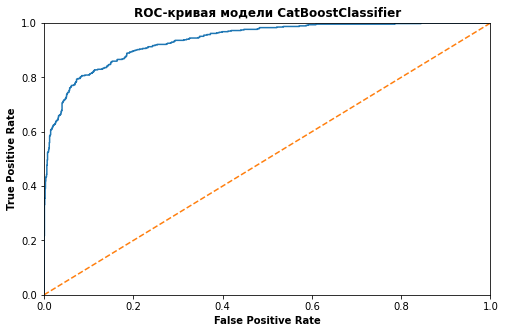

In [109]:
def curve(predict, name): # аргумент predict будет принимать предсказание модели
                          # аргумент name описательных характер о какой модели идет речь
        
    fpr, tpr, threshold = roc_curve(target_test, predict)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontweight='bold')
    plt.ylabel('True Positive Rate', fontweight='bold')
    plt.title('ROC-кривая модели' + ' ' + name, fontweight='bold')
    plt.show();
    
curve(predict_cbc, 'CatBoostClassifier')

График показывает зависимости **TPR** и **FPR**. По **roc_curve** наблюдаем, что модели предсказывали неслучайно, с начальным порогом около 0.35 для **CatBoostClassifier**.

* Посмотрим на финальную матрицу ошибок для **CatBoostClassifier** и на важность признаков в обучении и предсказании модели для метрики качества **roc_auc** 

In [111]:
confusion_predict = model_cbc.predict(features_test_ohe_nn)
confusion_matrix_cbc = confusion_matrix(target_test, confusion_predict)
display(confusion_matrix_cbc)

array([[1227,   64],
       [ 128,  342]])

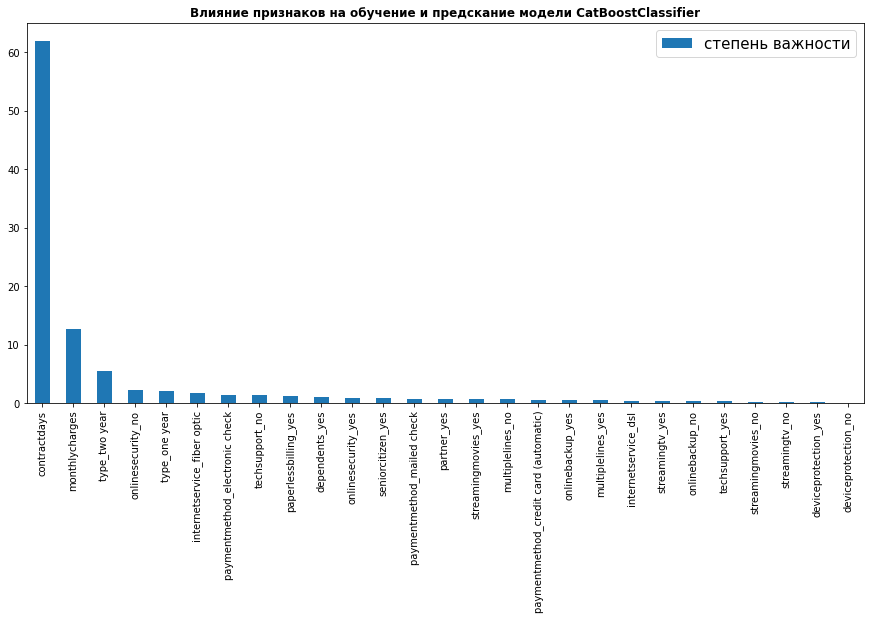

,степень важности
contractdays,61.998749
monthlycharges,12.655839
type_two year,5.475383
onlinesecurity_no,2.185042
type_one year,2.125435
internetservice_fiber optic,1.793968
paymentmethod_electronic check,1.439533
techsupport_no,1.394395
paperlessbilling_yes,1.300660
dependents_yes,1.065971


In [112]:
def features_importance(model, model_name):
    
    features_importance = pd.DataFrame(model.feature_importances_, columns=['степень важности'], 
                                       index=features_train_ohe_nn.columns)\
    .sort_values('степень важности', ascending=False)

    features_importance.plot(kind='bar', figsize=(15, 7))
    plt.title('Влияние признаков на обучение и предскание модели' + ' '+ model_name, fontweight='bold')
    plt.legend(fontsize=15)
    plt.show();
    
    display(features_importance)
    
features_importance(model_cbc, 'CatBoostClassifier')

Наблюдаем, что матрица ошибок для нашей **CatBoostClassifier** больше предсказывает ответом верно-позитивных **TP**, то есть тех клиентов, которые останутся. Мало ошибок, но чуть больше ложно-негативных **FN**, то есть чуть чаще ошибается с теми клиентами, которые уйдут.

* По важности признаков видим, что на первом месте кол-во дней на контракте с телекомом **contractdays**. Также большую роль имеет признак ежемясячной траты на услуги **monthycharges**;


* У модели **CatBoostClassifier** в топе окалася тип `type` оплаты `two year`;


* Все, что связано с услугами интернета, оказалаись не такими важными признакими для модели

Для окончательного вывода стоит проверить на адекватность выявленную лучшую финальную модель `CatBoostClassifier`, которая **подходит по критериям поставленной задачи, то есть значением `AUC_ROC`** 


Считаем значение метрики `accuracy_score` на модели **CatBoostClassifier** и вводим `констатную accuracy` для проверки на адекватность, а также `константное` значение `AUC_ROC ` (которое было установлено по условиям задачи):

In [113]:
final_acc = cross_val_score(model_cbc, features_train_ohe_nn, target_train, scoring='accuracy', cv=5).mean()
final_acc

0.8793999598635361

In [105]:
AUC_ROC_CONST = 0.75
constant = pd.Series(0, index=target.index)
accuracy_constant = accuracy_score(target, constant)
print(f'Константа: {accuracy_constant}')
print()

if (accuracy_constant < final_acc) and (final_acc >= AUC_ROC_CONST):
    print('Выявленная модель прошла тест на адекватность и подходит по критериям задачи')
else:
    print('Что-то пошло не так')

Константа: 0.7346301292063041

Выявленная модель прошла тест на адекватность и подходит по критериям задачи


### Вывод по модели

В результате анализа моделей, **лучше всего по критериям, которые необходимы оператору связи `«Ниединогоразрыва.ком»`, который хочет научиться прогнозировать отток клиентов**, подойдет модель **`CatBoostClassifier`** со значениями:

In [114]:
table['финальное значение AUC_ROC'] = round(auc_cbc_final, 4)
table.loc[table['модель'] == 'CatBoostClassifier', :]

,модель,~ время обучения и предсказания (мин.),AUC-ROC,финальное значение AUC_ROC
0,CatBoostClassifier,3.0,0.9258,0.9366


## Отчет по выполненной работе

* Были загружены и разобраны данные;
* В ходе первичного анализа были обнаружены не совсем корректные типы данных в датасете с контрактами **data_contract**. В колонках `BeginDate` и `EndDate` был тип данных строковым `str`, хотя там хранятся даты. Поменяли тип данных на **datetime**. Также тип данных в колонке `TotalCharges` являлся точно не корректным - строковым **str**. Поменяли на вещественный тип данных **float**;
* Названия колонок были записаны в не очень удобном регистре. Привели их в нижний регистр для всех датасетов в качестве итога первичного анализа;
* В ходе предобработки данных создали новый признак **`exited`** (ушедший), который и стал целевым признаком;
* В ходе предобработки данных были также обнаружены пропуски в колонке `TotalCharges`, когда меняли тип данных. Там отсутствовали значения. Все пропуски в общей сумме обнаружены в день выгрузки данных, то есть это прозошло в тот актуальный день, после которого еще не прошло время. Поставили значения с колонки `'monthlycharges'` на месте пропусков, так как цену определнную они уже платят, значит это и составляет их общую сумму;
* Добавили новый признак с днями на контракте кажого клиента **contractdays**. Этот признак поможет модели лучше предсказывать и обучаться;
* Объединили все датасеты в единый датафрейм методом `merge()`. В результате объединения были обнаружены пропуски в признаках с услушами интернета и телефонной мульти функцией, и посчитали их процент пропусков от общего размера датафрейма:

* Пропуски обуславливается тем, что в датасете с интернетом `data_internet` и с телефоном `data_phone` есть не все пользователи, которые пользуются. Данные пропуски пометили как "недействующие", и заполнили соответственно `'dont_use'`;
* Проверили датасет на аномальные значения, создав срез из количественных колонок датафрейма. Создали функцию, которая будет вывела диаграмму размаха и описание данной колонки. С ее помощью посмотрели на **выбросы и аномальные значения**, который **не было обнаружено**;
* В ходе исследовательского анализа обнаружили, что **массовые уходы**  были в **2019** году, начиная с `Октября` по `Декабрь`;
* Посмотрели на кол-во дней клиентов, которые остались, и которые ушли. А также на месячную стоимость, сколько они платили в среднем, сколько максимум/минимум:

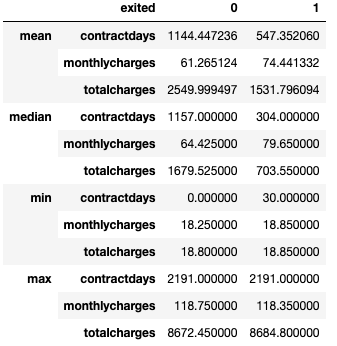

Где 0 - оставшиеся клиенты, а 1 - ушедшие;
* Также сделали визуальную демонстрацию изменения ежемесячной и общей стоимости по годам. Для этого создали функцию **graph**, в которой сгруппировали по решению клиента **exited**, посчитали средние и суммарные функции по ежемесячной и общей стоимости   `monthlycharges`, `totalcharges` по колонке с началом года `begindate`, а затем построили графики по каждому из них:

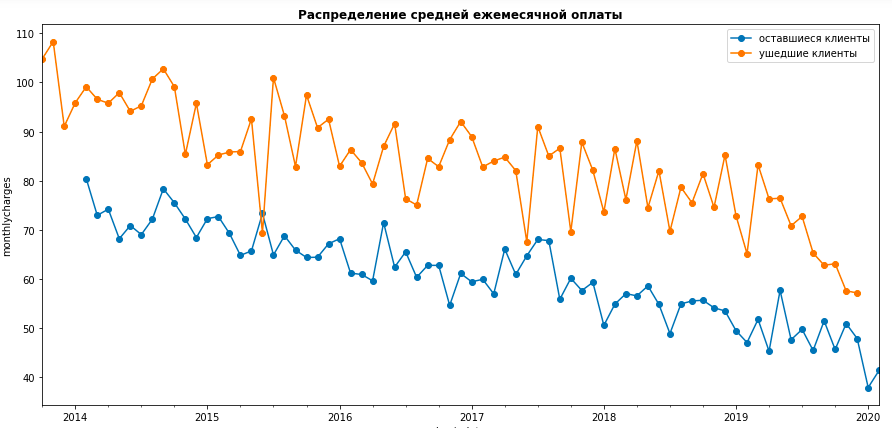

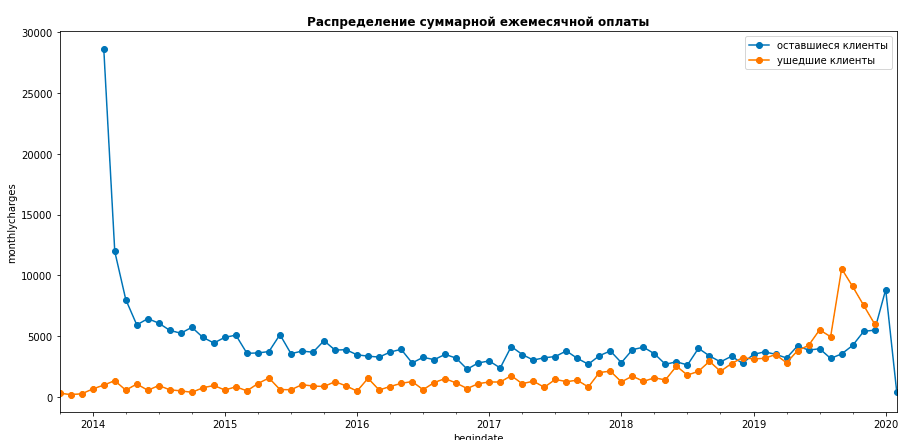

* **По графикам и данным разобрали, что**: 
   * в среднем клиенты, которые ушли, платили больше ежемесячно, причем на регулярной основе из года в год;
   * средняя общая стоимость услуг также больше для ушедших клиентов. начала сравниваться к 2020 году;
   * также суммарная стоимость услуг начала возрастать для ушедших клиентов с начала 2019 года;
   * для оставшихся клиентов общая стоимость услуг была выше до 2019 года (и средння, и суммарная);
   * ушедшие клиенты были в среднем чуть больше полтора года (547 дней). Но вот медиана составляет даже меньше года - 304 дня;
   * минимум 30 дней потребовалось клиенту, чтобы он ушел
   
   
* Создали графическую функцию **statistic_graph**, которая отображает оставшихся и ушедших клиентов и востребованность при этом разных услуг и их влияние на решение клиента. **По ним были сделаны выводы**:
   * на решение клиентов с наличием ведения параллельных линий во время звонка `multiplelines`, почти никак не сказалась данная функция;
   * а вот на ушедших клиентов пришлась большая доля с наличием интернет сервиса `internetservice` - **fiber optic**. У большого процента осташихся клиентов **`~27%`** вообще нет никакоо интернет сервиса;
   * как ни странно, у клиентов, у которых нет иждивенцев `dependents`, сказалось на уход. Возможно с наличием кого-то (детей) нет времени тратить на поиск лучшего предложения у другого тарифа. Среди ушедших **`~83%`** без иждивенцев;
   * также клиенты с наличием партнера `partner` более лояльны, чем без. То есть снова видим тенденцию, что у ушедших клиентов чаще нет иждивенцев и партнера. Около **`64%`** ушедших клиентов - одиночки;
   * люди с наличием пенсионного статуса seniorcitizen чаще уходят, правда почти они равны и оставшимся клиентам;
   * наблюдаем, что гендер gender почти никак не влияет;
   * видим, что клиенты, которые ушли, чаще оплачивали за услуги paymentmethod электронным чеком - **electronic check**. Среди ушедших, этот способ занял около **`57%`**. Вероятно, есть какие-то проблемы с этим видом оплаты. У тех, которые остались, наблюдается баланс в способах опаты;
   * видна тенденция, что уходящие клиенты, выбирают чаще всего безбумажный расчётный лист `paperlessbilling`. Почти **`75%`**;
   * по типу оплаты `type` от месяца к месяцу `month-to-month` чаще уходят клиенты. Ранее заметили, что среди ушедших, средняя ежемесячная оплата на порядок была выше, чем у тех, кто остался
   
   
* Удалили столбцы с началом действия контракта `begindate` и с расторжением `enddate`, чтобы модель не знала ответы наперед и нормально предсказывала. Также колонку с ID клиента `customerid`. Признак `'seniorcitizen'` имеет тип данных целочисленный, являясь количественным признаком. Для удобства, поменяли значения на строковые yes - 1, no - 0, а потом занесли его в категориальные признаки для кодирования;
* Представили виузально корреляцию всех признаков между собой. Для этого загрузили библиотеку **phik**. Эта библиотека работает со всеми признаками (то есть не только количественными):

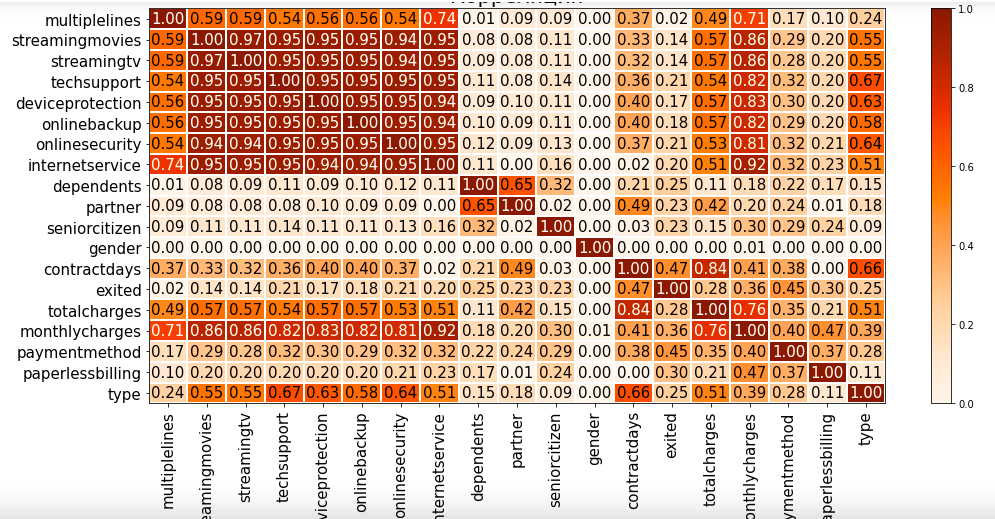

* И по ней сделали выводы:
   * заметили, что пол **`gender`** вообще никак не коррелирует с целевые признаком **`exited`**, да и вообше ни с каким признаком. Удалили его из выборки;
   * Больше всего коррелируют с целевым признаком **`exited`** наш созданный признак с днями на контракте **`contractdays`**. Также хорошо коррелируют такие признаки как: `type`, `paperlessbilling`, `paymentmethod`, `monthlycharges` и `totalcharges`. Удалили `totalcharges`, так как для количественных признаков была замечена большая корреляци **0.84**, так как его можно будет восстановить при помощи `monthlycharges` и `contractdays`. ;
   * `очень сильная корреляция` между различными `услугами интернета` (не меньше **0.92**). Можно сказать, что они все между собой заменяемы


* В итоге, список признаков, которые использовались для обучения, получился такой:

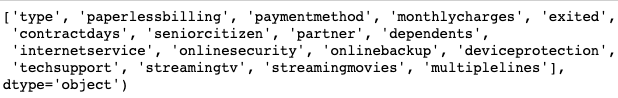

* Данные были поделены в соотношении **4:1**. `25%` составила **тестовая выборка**


* После разделения на выборки, обнаружили на них дисбаланс классов. Если прогнозировали, что клиент НЕ уйдет, то в почти **`74%`** были бы  правы. Но метрика **AUC-ROC** не чувствительна к дисбалансу. Поэтому было принято решение, проводить обучение и предсказывать на обычных выборках с балансировкой классов `class_weight='balanced'`;


* В качестве учебного процесса и только в рамках дополнительного исследования, были сделаны выборки техникой **upsample** и **downsample**;


* Была разработана функция масштабирования **scale** для линейных моделей. Но хоть и не рекомендуется масштабирвоать данные для моделей бустинга и деревьев, также посмотрели и на них значение метрик на масштабированных данных;


* Была разработана функция для кодирования категориальных данных **coder**. Она взяла за основу кодирования `OheHotEncoder` из **sklearn**. Функция использоваласб для всех выборок (обучающая, увеличенная, уменьшенная);


* Методом `join()` объединили закодированный датасет с количественными признаками по индексам. Для данных на **upsampled** и **downsampled** произвели присоединение мастабированных признаков. Также для выборки **upsampled** были сброшены индексы, и просоединены количественные признаки, в качестве избегания удвоения данных;


* Создали функцию для рассчитывания параметров и лучшего значения для **AUC-ROC**. Считали при помощи **`GridSearchCV()`**. Эта техника обучает модель с заданными нами в перечни параметрами, из которых выберет лучшие для встроенной расчетной метрики **AUC-ROC**, используя кросс валидацию;


* Также вывели дополнительную метрику точности **accuracy** моделям при помощи атрибута `best_estimator_` и `cross_val_score`;


* Ввели функцию частоты `class_frequency` для подсчета относительных частот. Перевели таблицу в тип `Series`, чтобы смогла `value_counts(normalize=True)` выявить классы. Вывели **матрицу ошибок** `confusion_matrix` для проверки баланса;


* Рассмотрели 4 модели на разных выборках: `CatBoostClassifier`, `LightGBMClassifier`, `LogisticRegression` и `RandomForesClassifier`;


* Перебирали разные параметры для моделей:
   * `CatBoostClassifier`: **'iterations'**: `range(100, 1001, 150)`, **'max_depth'**: `range(1, 5)`, **learning_rate=0.1**;
   * `LightGBMClassifier`: **'n_estimators'**: `range(100, 1001, 150)`, **learning_rate=0.1**, `class_weight='balanced'`;
   * `LogisticRegression`: **'max_iter'**: range(100, 1001, 150), **'penalty'**: `['l1', 'l2', 'elasticnet']`;
   * `RandomForesClassifier`: **'max_depth'**: range(2, 9, 2), **'min_samples_leaf'**: range(4, 9, 2), **'min_samples_split'**: range(5, 6), **'n_estimators'**: range(100, 101), `class_weight='balanced'`;
   

* В результате были выявлены такие результаты:

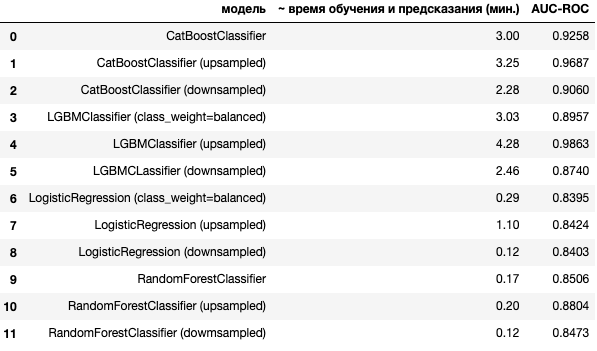

* Помним, что выборки **upsampled** и **downsampled** только в рамках дополнительного изучения;


* Лучшей моделью в результате кросс-валидации была выявлена **CatBoostClassifier** с гиперпараметрами: 

`(iterations=850, max_depth=4, learning_rate=0.1, verbose=False, random_state=RANDOM_STATE)`;


* Она и была выбрана для финальной проверки на тестовой выборке;


* Для лучшей модели была построена **roc_curve** (кривую), чтобы посмотреть, как предсказывала она:

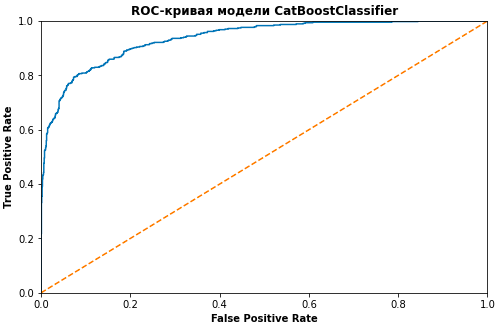

* Посмотрели на финальную матрицу ошибок для **CatBoostClassifier** и на важность признаков в обучении и предсказании модели для метрики качества **roc_auc**. По матрице ошибок можно сказать, что модель CatBoostClassifier предсказывает в соотношении клиентов, которые останутся, к клиентам, которые уйдут 3:1. Самих ошибок немного (больше FN ложно-негативных, то есть там, где модель предсказала, что уйдет, а ответ показал, что останется)


* Посмотрели на важность признаков для обучения и предсказывания лучшей модели:
    * По важности признаков видим, что на первом месте кол-во дней на контракте с телекомом **contractdays**. Также большую роль имеет признак ежемясячной траты на услуги **monthycharges**;
    * У модели **CatBoostClassifier** в топе окалася тип `type` оплаты `two year`;
    * Все, что связано с услугами интернета, оказалаись не такими важными признакими для модели
    
   
* Проверили на адекватность **CatBoostClassifier**, посчитав метрику качества **accuracy** на **cross_val_score**;


* В результате анализа моделей и финального тестирования, **лучше всего по критериям, которые необходимы оператору связи `«Ниединогоразрыва.ком»`, который хочет научиться прогнозировать отток клиентов**, подойдет модель **`CatBoostClassifier`** со значениями: 
  * Метрика качества **AUC-ROC** лучшей модели `0.9366292005207904`
  
  
* Отличий от исходного плана не было;


* Трудности в работе не наблюдались, сплошной интерес;


* Все этапы были важны для анализа